# Importation des librairies

In [1]:
# OS
import sys

# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight') 

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABORN
import seaborn as sns

# SCHIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encodage des variables catégorielles nominales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # encodage des variables catégorielles ordinales
from sklearn.preprocessing import StandardScaler # normalisation des variables numériques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # imputation
from sklearn.impute import KNNImputer 


# SCHIKIT-LEARN: MODELES
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet

# SCHIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # 
from sklearn.model_selection import cross_val_score # validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # courbe de validation: visulaisr les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # tester plusieurs hyper_paramètres
from sklearn.model_selection import learning_curve # courbe d'apprentissage: visualisation les scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
## EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# SCHIKIT-LEARN: PIPELINE
from sklearn.pipeline import make_pipeline


# Chargement des données

In [2]:
import os
Covid_data = pd.read_excel('C:/Users/cleme/Downloads/covid-19.xlsx')

# Description des données

In [3]:
Covid_data.head(10)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   
5  75f16746216c4d1                     9               negative   
6  2a2245e360808d7                    13               negative   
7  509197ec73f1400                    16               negative   
8  8bb9d64f0215244                     1               negative   
9  5f1ed301375586c                    17               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
5                                               0   
6                                               0   
7                                               0   
8                                               0   
9                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       
5                                                  0       
6                                                  0       
7                                                  0       
8                                                  1       
9                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   
5                                                  0             NaN   
6                                                  0             NaN   
7                                                  0             NaN   
8                                                  0       -1.571682   
9                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1   -0.022340  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   
5         NaN        NaN                    NaN              NaN          NaN   
6         NaN        NaN                    NaN              NaN          NaN   
7         NaN        NaN                    NaN              NaN          NaN   
8   -0.774212   1.429667              -1.672222        -0.850035    -0.005738   
9         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                         -0.950790    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                           

In [4]:
Covid_data.tail(3)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903         0.578024   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
5641          NaN                                               NaN   
5642          NaN                                               NaN   
5643    -0.295726                                         -0.353319   

      Leukocytes  Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
5641         NaN        NaN                                NaN          NaN   
5642         NaN        NaN                                NaN          NaN   
5643   -1.288428  -1.140144                          -0.135455    -0.835508   

      Mean corpuscular volume (MCV)  Monocytes  \
5641                            NaN        NaN   
5642                            NaN        NaN   
5643                       0.025985   0.567652   

      Red blood cell distribution width (RDW)  Serum Glucose  \
5641                                      NaN            NaN   
5642                                      NaN            NaN   
5643                                 -0.18279            NaN   

     Respiratory Syncytial Virus Influenza A Influenza B Parainfluenza 1  \
5641                         NaN         NaN         NaN             NaN   
5642                         NaN         NaN         NaN             NaN   
5643                         NaN         NaN         NaN             NaN   

     CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
5641             NaN                    NaN                    NaN   
5642             NaN                    NaN                    NaN   
5643             NaN                    NaN                    NaN   

     Coronavirus HKU1 Parainfluenza 3 Chlamydophila pneumoniae Adenovirus  \
5641              NaN             NaN                      NaN        NaN   
5642              NaN             NaN                      NaN        NaN   
5643              NaN             NaN                      NaN        NaN   

     Parainfluenza 4 Coronavirus229E CoronavirusOC43 Inf A H1N1 2009  \
5641             NaN             NaN             NaN             NaN   
5642             NaN             NaN             NaN             NaN   
5643             NaN             NaN             NaN             NaN   

     Bordetella pertussis Metapneumovirus Parainfluenza 2  Neutrophils  \
5641                  NaN             NaN             NaN          NaN   
5642                  NaN             NaN             NaN          NaN   
5643                  NaN             NaN             NaN     0.380685   

          Urea  Proteina C reativa mg/dL  Creatinine  Potassium    Sodium  \
5641       NaN                       NaN        

In [5]:
Covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [6]:
Covid_data.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [7]:
Covid = Covid_data.copy()

In [8]:
Covid['Patient ID']

0       44477f75e8169d2
1       126e9dd13932f68
2       a46b4402a0e5696
3       f7d619a94f97c45
4       d9e41465789c2b5
5       75f16746216c4d1
6       2a2245e360808d7
7       509197ec73f1400
8       8bb9d64f0215244
9       5f1ed301375586c
10      d720464cc322b6f
11      02c84e61d5f9e18
12      b68a6f32fd88a49
13      0fbafd910aa8078
14      f9056545d1296ec
15      6c9d3323975b082
16      b62e45a8a3f683e
17      99da3c055438133
18      d3ea751f3db9de9
19      315cc65959223e0
20      fe656baa2bfc5dd
21      93b8a7ad37b1400
22      2c2eae16c12a18a
23      59b54b15e19da77
24      d153a96599e2d41
25      6b43d02183a4e72
26      fe26809ebb6ef44
27      50abe42feb0b703
28      fc41531ca4faf1e
29      891d0f6449ff3d7
30      ebdd7c67fcb21b4
31      554ce78d5936fe8
32      296adf066a9bf03
33      6da0fb1799dbf57
34      0b1e43c5e3fb1d1
35      39bfa1be6de588e
36      c0aa8a22eaccb63
37      a1bd3d591a72633
38      826f654dbf80245
39      2e1cada13fa6439
40      a2432a45830c32d
41      18033e28

# Analyse exploratoire

In [9]:
duplicate_Co = Covid[Covid.duplicated()]
duplicate_Co

Empty DataFrame
Columns: [Patient ID, Patient age quantile, SARS-Cov-2 exam result, Patient addmited to regular ward (1=yes, 0=no), Patient addmited to semi-intensive unit (1=yes, 0=no), Patient addmited to intensive care unit (1=yes, 0=no), Hematocrit, Hemoglobin, Platelets, Mean platelet volume , Red blood Cells, Lymphocytes, Mean corpuscular hemoglobin concentration (MCHC), Leukocytes, Basophils, Mean corpuscular hemoglobin (MCH), Eosinophils, Mean corpuscular volume (MCV), Monocytes, Red blood cell distribution width (RDW), Serum Glucose, Respiratory Syncytial Virus, Influenza A, Influenza B, Parainfluenza 1, CoronavirusNL63, Rhinovirus/Enterovirus, Mycoplasma pneumoniae, Coronavirus HKU1, Parainfluenza 3, Chlamydophila pneumoniae, Adenovirus, Parainfluenza 4, Coronavirus229E, CoronavirusOC43, Inf A H1N1 2009, Bordetella pertussis, Metapneumovirus, Parainfluenza 2, Neutrophils, Urea, Proteina C reativa mg/dL, Creatinine, Potassium, Sodium, Influenza B, rapid test, Influenza A, rapid test, Alanine transaminase, Aspartate transaminase, Gamma-glutamyltransferase , Total Bilirubin, Direct Bilirubin, Indirect Bilirubin, Alkaline phosphatase, Ionized calcium , Strepto A, Magnesium, pCO2 (venous blood gas analysis), Hb saturation (venous blood gas analysis), Base excess (venous blood gas analysis), pO2 (venous blood gas analysis), Fio2 (venous blood gas analysis), Total CO2 (venous blood gas analysis), pH (venous blood gas analysis), HCO3 (venous blood gas analysis), Rods #, Segmented, Promyelocytes, Metamyelocytes, Myelocytes, Myeloblasts, Urine - Esterase, Urine - Aspect, Urine - pH, Urine - Hemoglobin, Urine - Bile pigments, Urine - Ketone Bodies, Urine - Nitrite, Urine - Density, Urine - Urobilinogen, Urine - Protein, Urine - Sugar, Urine - Leukocytes, Urine - Crystals, Urine - Red blood cells, Urine - Hyaline cylinders, Urine - Granular cylinders, Urine - Yeasts, Urine - Color, Partial thromboplastin time (PTT) , Relationship (Patient/Normal), International normalized ratio (INR), Lactic Dehydrogenase, Prothrombin time (PT), Activity, Vitamin B12, Creatine phosphokinase (CPK) , Ferritin, Arterial Lactic Acid, Lipase dosage, D-Dimer, ...]
Index: []

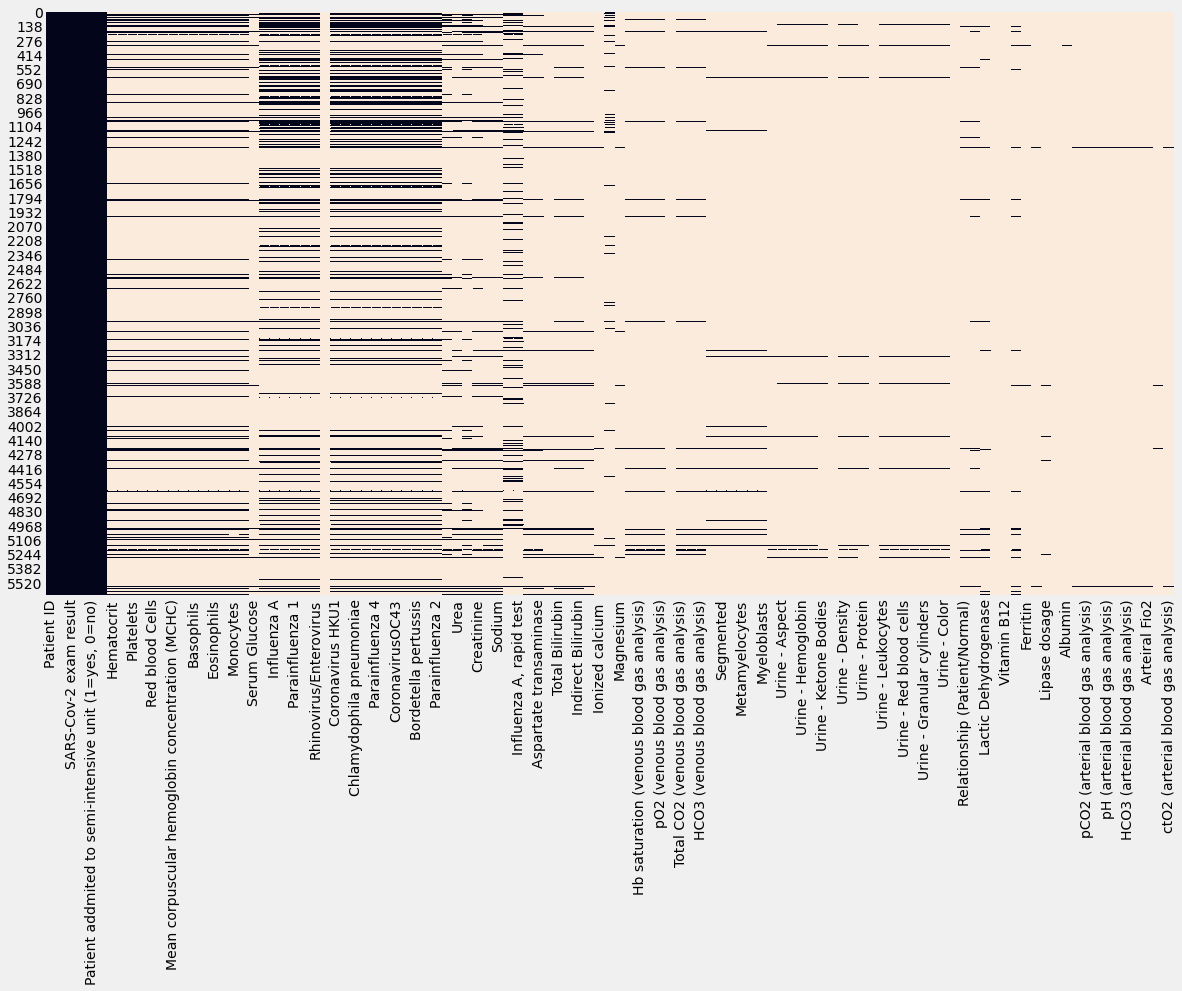

In [10]:
plt.figure(figsize=(18, 10))
sns.heatmap(Covid.isna(), cbar=False)
plt.show()

In [11]:
del Covid['Patient ID']

In [12]:
n_samples, n_features = Covid.shape
Covid = Covid[Covid.columns[Covid.isna().sum()/n_samples != 1.0]]
(Covid.isna().sum()/n_samples).sort_values()

Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Parainfluenza 2                                          0.760454
Metapneumovirus                                          0.760454
Bordetella pertussis                                     0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainflue

In [13]:
Covid['SARS-Cov-2 exam result'] = [False if i == 'negative' else True for i in Covid['SARS-Cov-2 exam result']]
Covid = Covid[Covid.columns[Covid.dtypes != 'object']]
(Covid.isna().sum()/n_samples).sort_values()

Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Red blood cell distribution width (RDW)                  0.893338
Mean corpuscular volume (MCV)                            0.893338
Eosinophils                                              0.893338
Mean corpuscular hemoglobin (MCH)                        0.893338
Basophils                                                0.893338
Leukocytes                                               0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Lymphocytes                                              0.893338
Red blood 

In [14]:
Covid['SARS-Cov-2 exam result']

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67       True
68      False
69      False
70      False
71    

In [15]:
plt.figure(figsize=(20, 10))
Covid.corr()['SARS-Cov-2 exam result'].sort_values()

pCO2 (arterial blood gas analysis)                      -0.323977
Arteiral Fio2                                           -0.310583
Ionized calcium                                         -0.305113
Leukocytes                                              -0.288508
Platelets                                               -0.282268
Total CO2 (arterial blood gas analysis)                 -0.249422
HCO3 (arterial blood gas analysis)                      -0.213858
Eosinophils                                             -0.192609
Urine - Density                                         -0.180874
Indirect Bilirubin                                      -0.141361
Total Bilirubin                                         -0.125322
Phosphor                                                -0.122276
Arterial Lactic Acid                                    -0.121132
Metamyelocytes                                          -0.101046
Sodium                                                  -0.092970
Potassium 

<Figure size 1440x720 with 0 Axes>

In [16]:
len(Covid['SARS-Cov-2 exam result'])

5644

In [17]:
T = []
for i in range(len(Covid.corr()['SARS-Cov-2 exam result'])):
    if (abs(Covid.corr()['SARS-Cov-2 exam result'][i]) < 0.10):
        T.append(Covid.corr()['SARS-Cov-2 exam result'].index[i])

In [18]:
for i in T:
    del Covid[i]
(Covid.isna().sum()/n_samples).sort_values()

SARS-Cov-2 exam result                            0.000000
Patient addmited to regular ward (1=yes, 0=no)    0.000000
Hemoglobin                                        0.893161
Platelets                                         0.893338
Eosinophils                                       0.893338
Red blood Cells                                   0.893338
Leukocytes                                        0.893338
Monocytes                                         0.893515
Mean platelet volume                              0.893870
Aspartate transaminase                            0.959957
Alanine transaminase                              0.960135
Total Bilirubin                                   0.967753
Indirect Bilirubin                                0.967753
Gamma-glutamyltransferase                         0.972892
Base excess (venous blood gas analysis)           0.975904
Lactic Dehydrogenase                              0.982105
Myeloblasts                                       0.9828

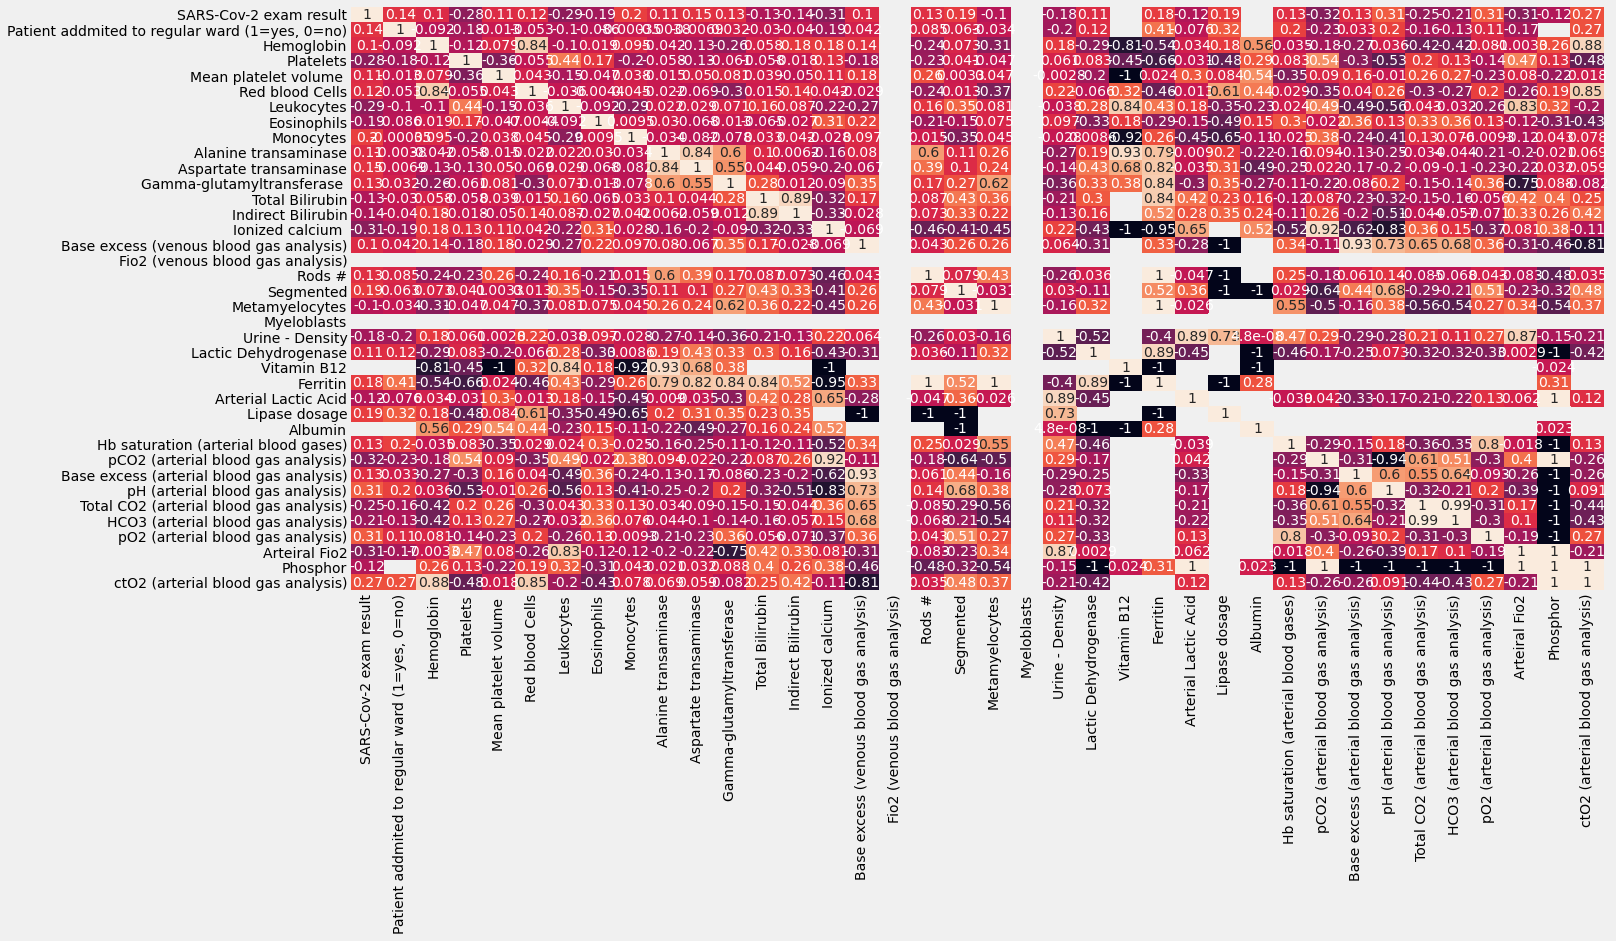

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(Covid.corr(), annot=True, cbar=False) #
plt.show()

# Variable cible

In [20]:
Covid["SARS-Cov-2 exam result"].value_counts()

False    5086
True      558
Name: SARS-Cov-2 exam result, dtype: int64

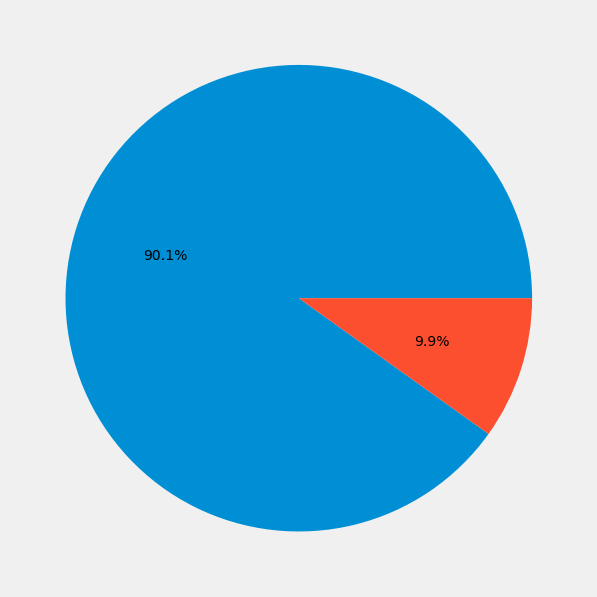

In [21]:
plt.figure(figsize=(18, 10))
plt.pie(Covid["SARS-Cov-2 exam result"].value_counts(), autopct='%1.1f%%')
plt.show()

# Analyse univariée 

In [22]:
Covid.dtypes.value_counts()

float64    36
int64       1
bool        1
dtype: int64

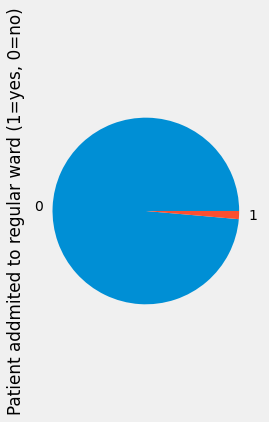

In [23]:
for feature in Covid.select_dtypes('Int64'):
    plt.figure()
    Covid[feature].value_counts().plot.pie()
    plt.show()

# Distribution des variables numériques

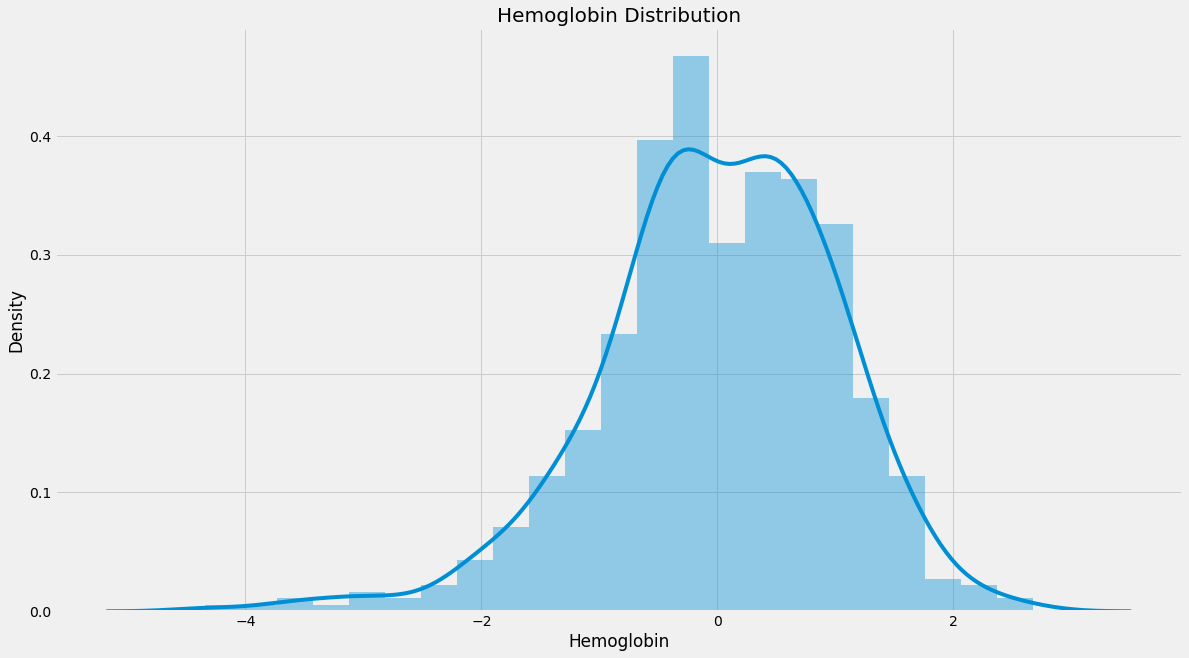

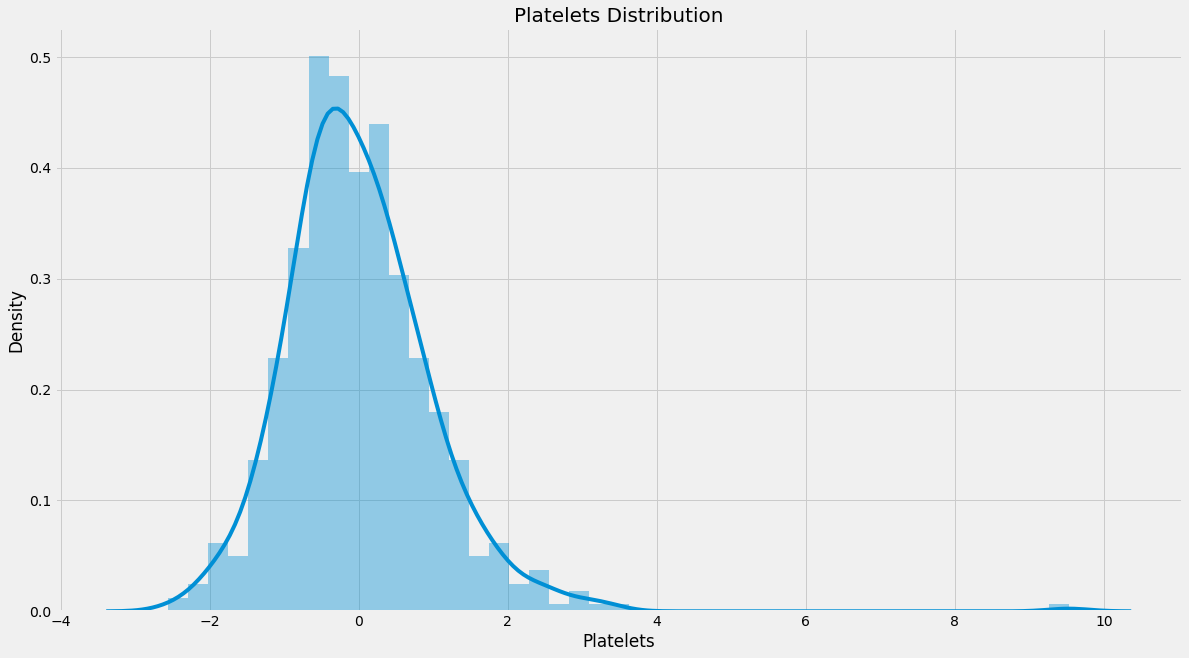

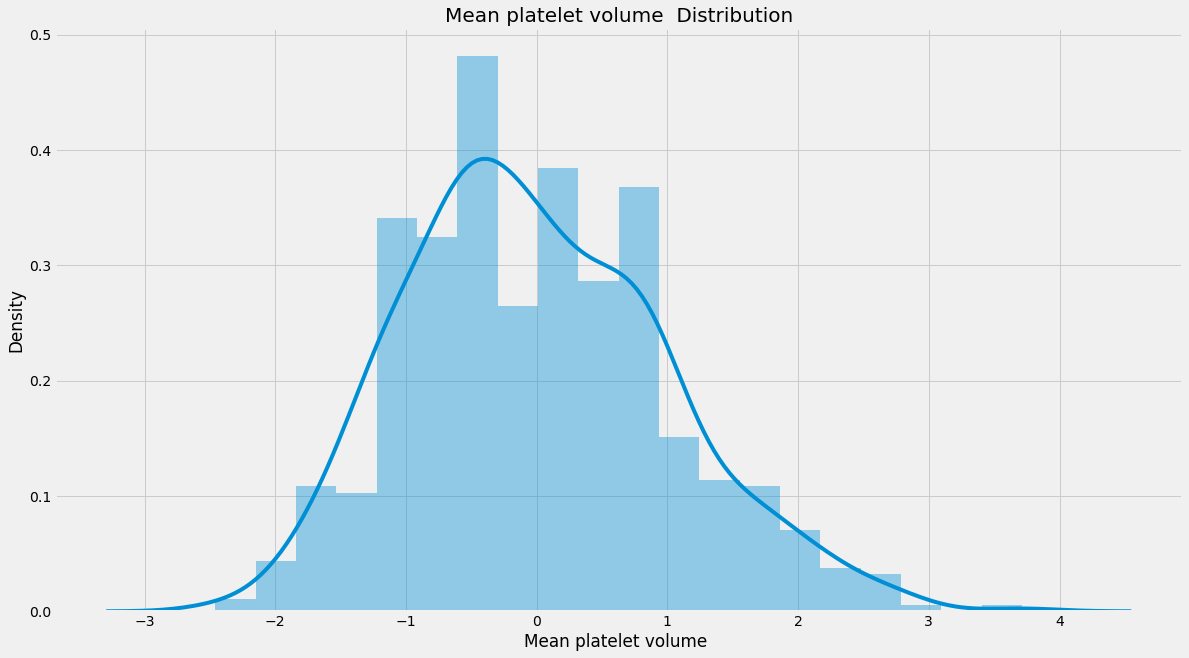

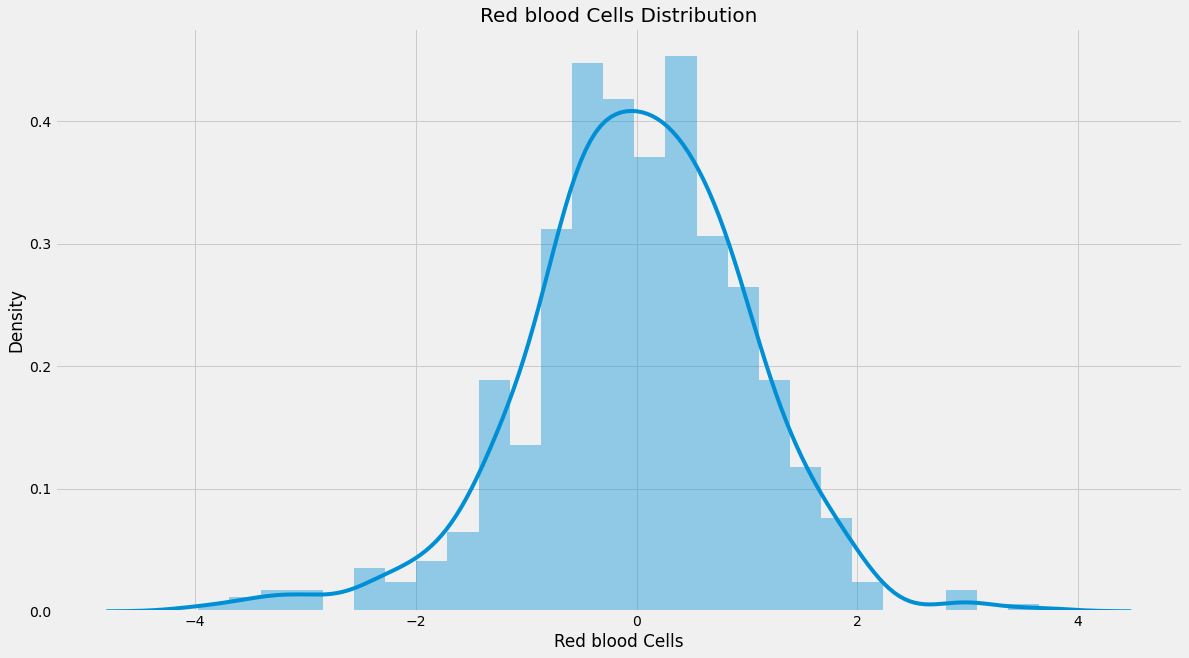

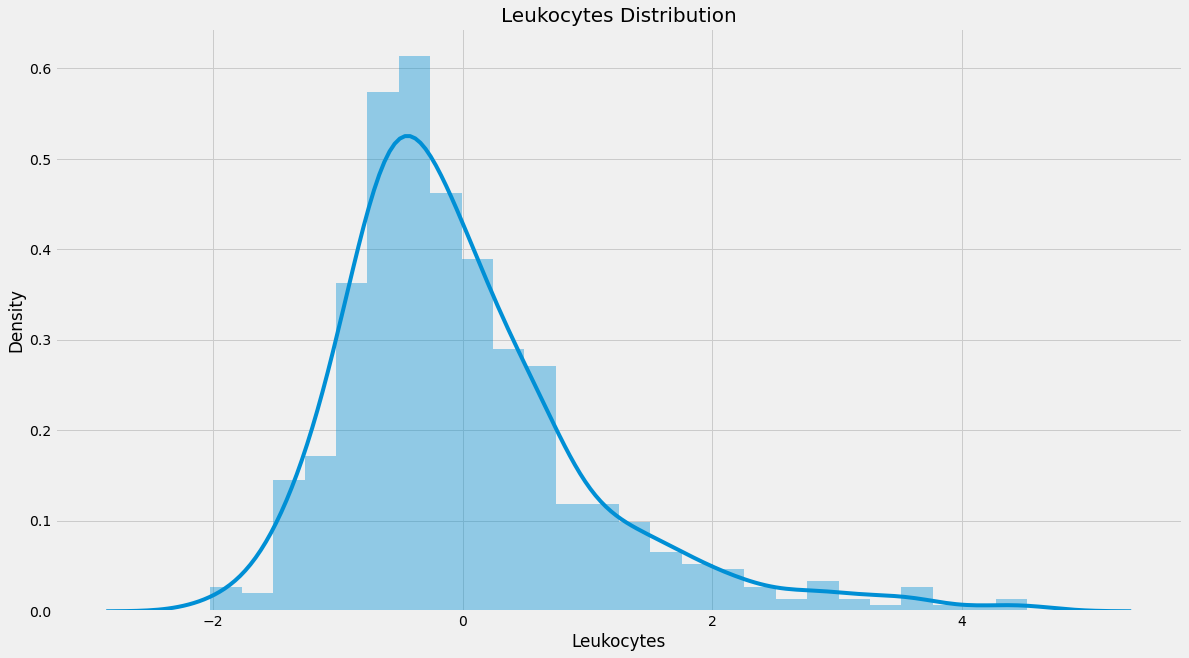

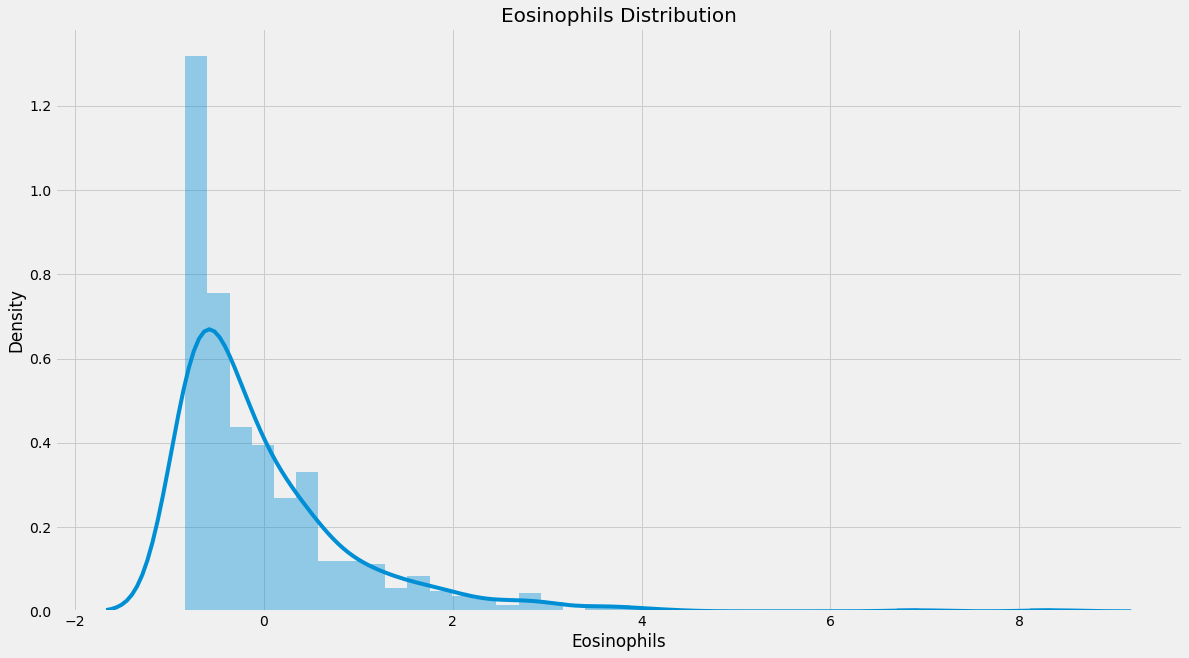

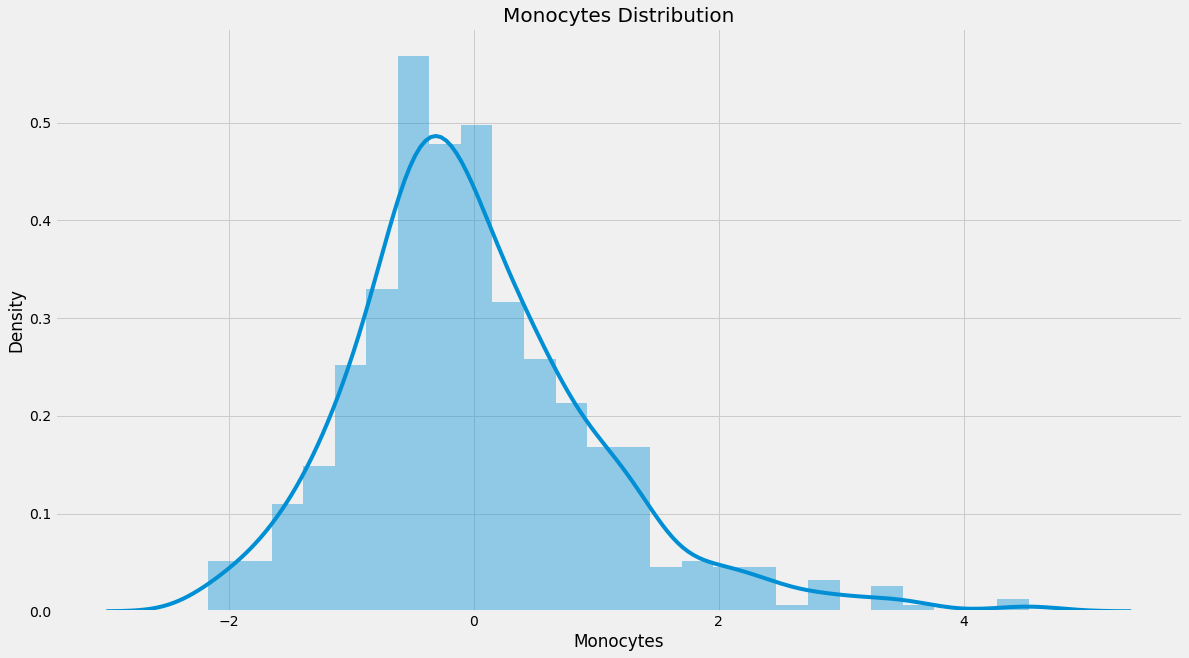

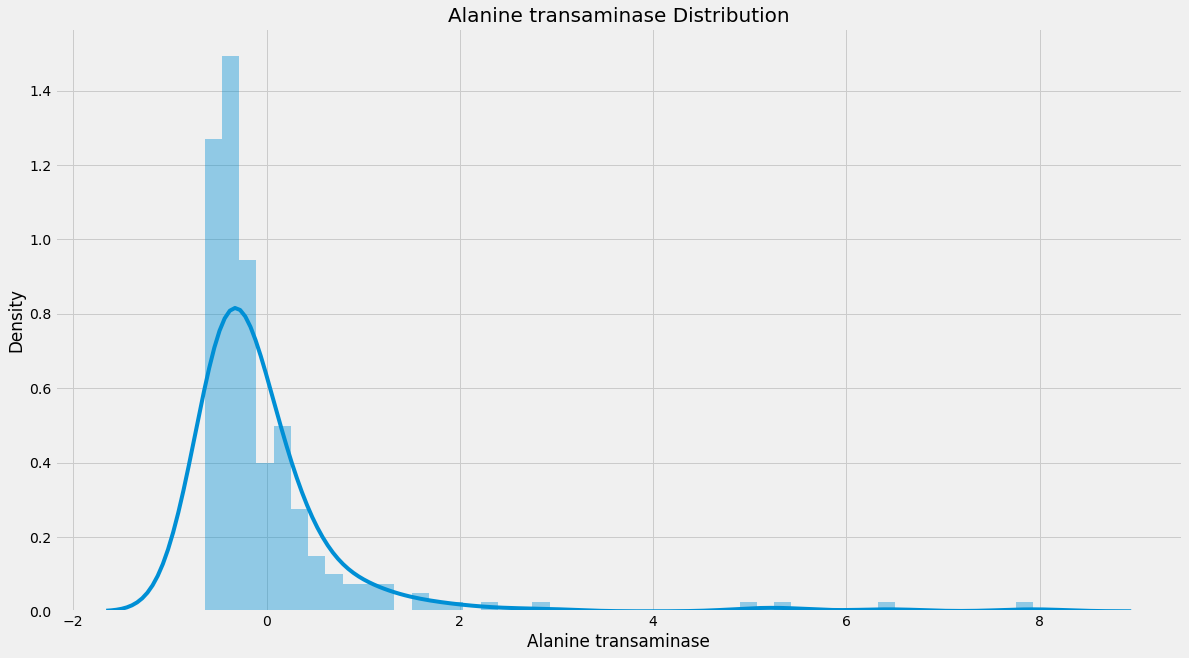

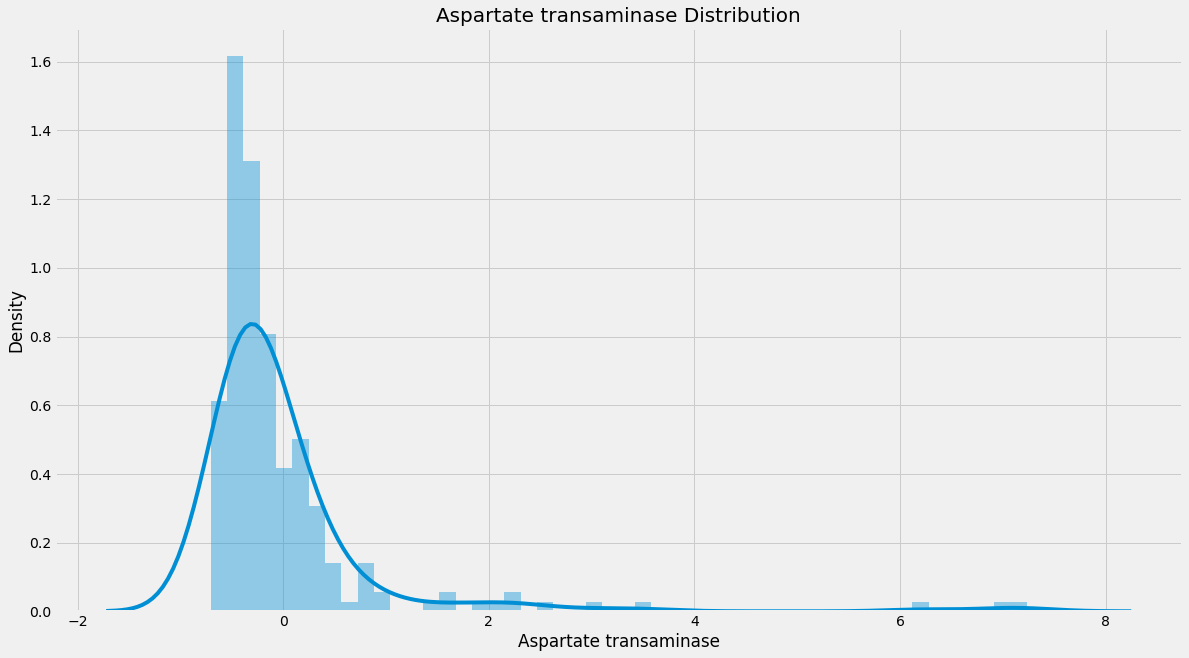

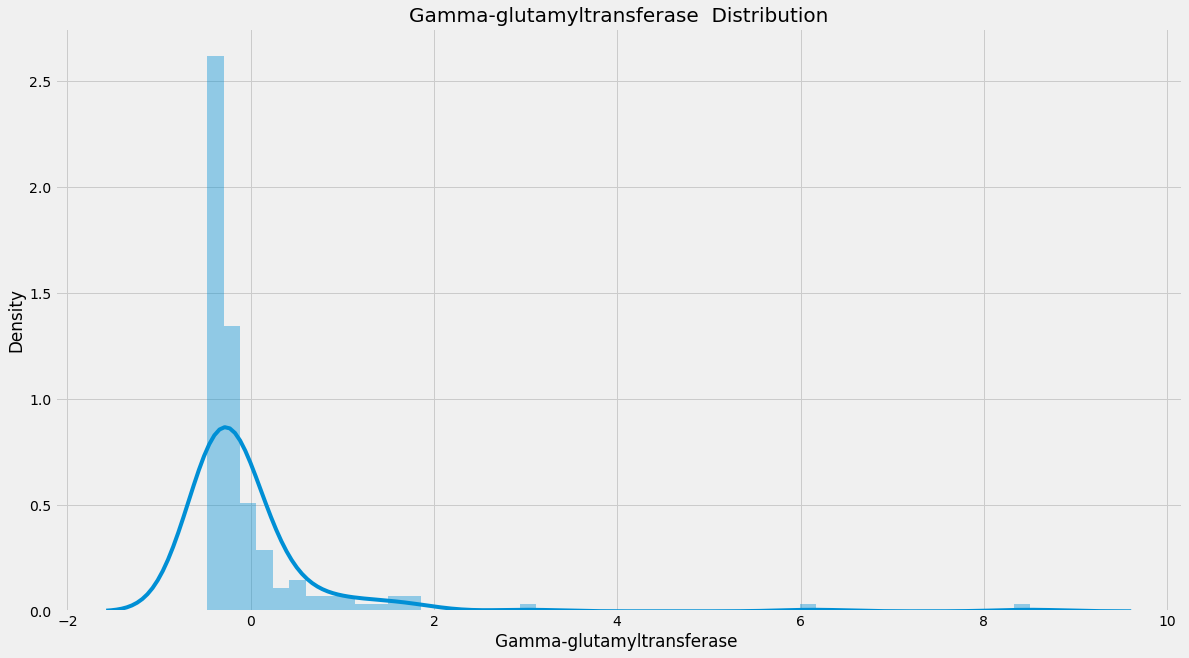

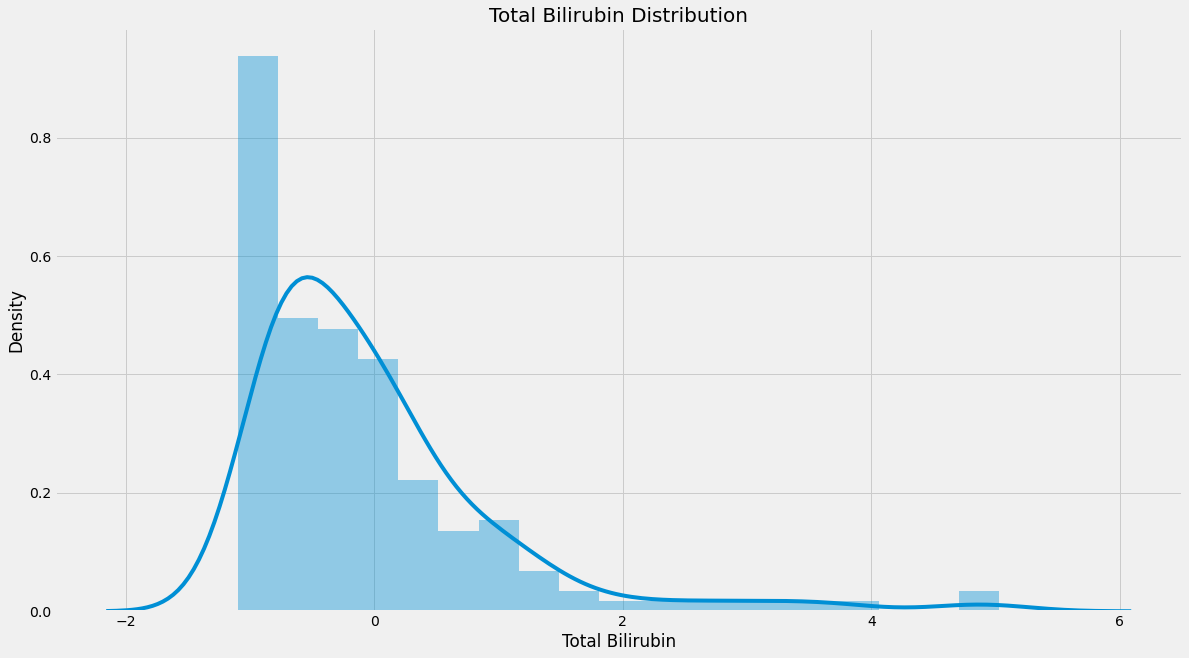

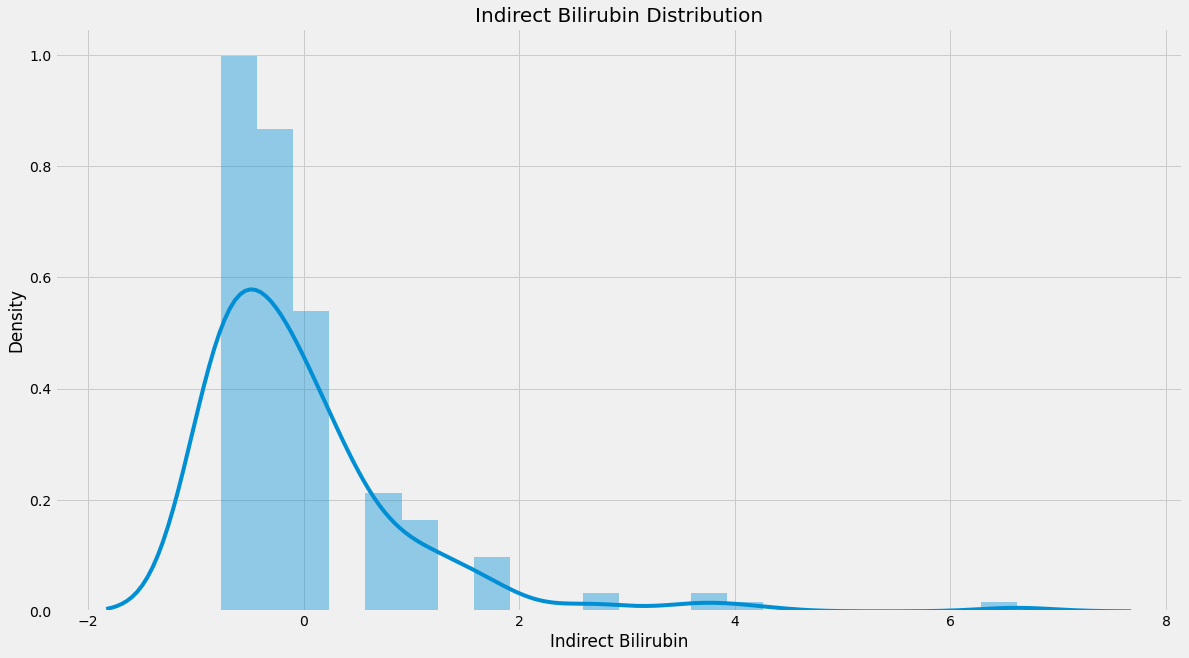

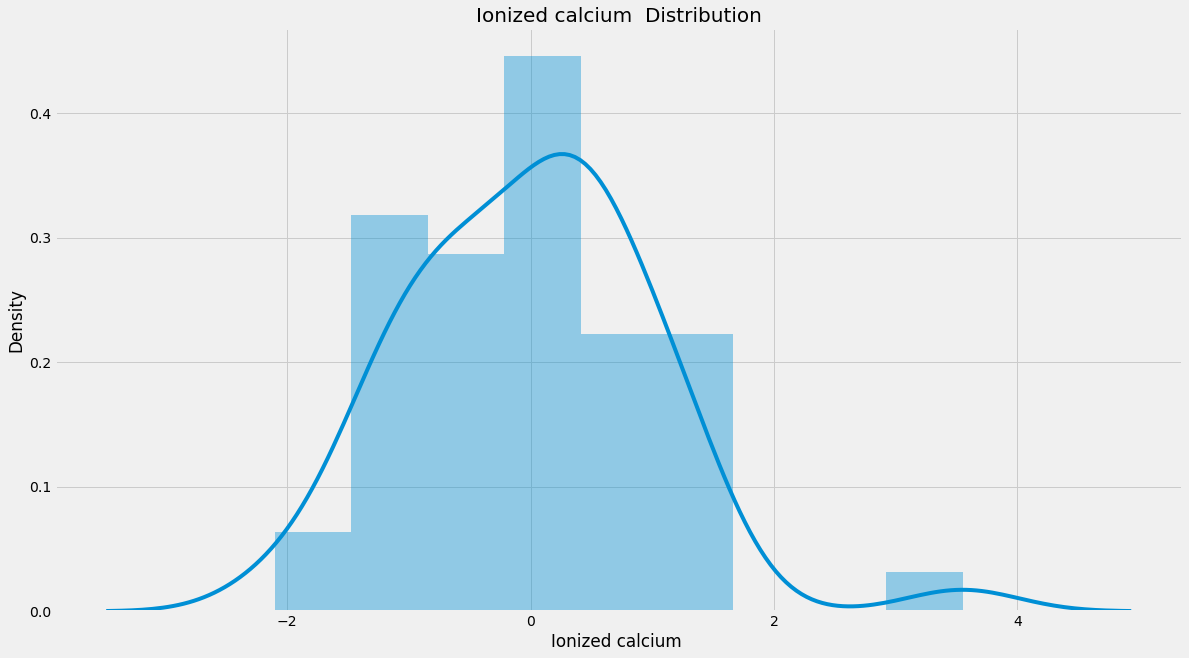

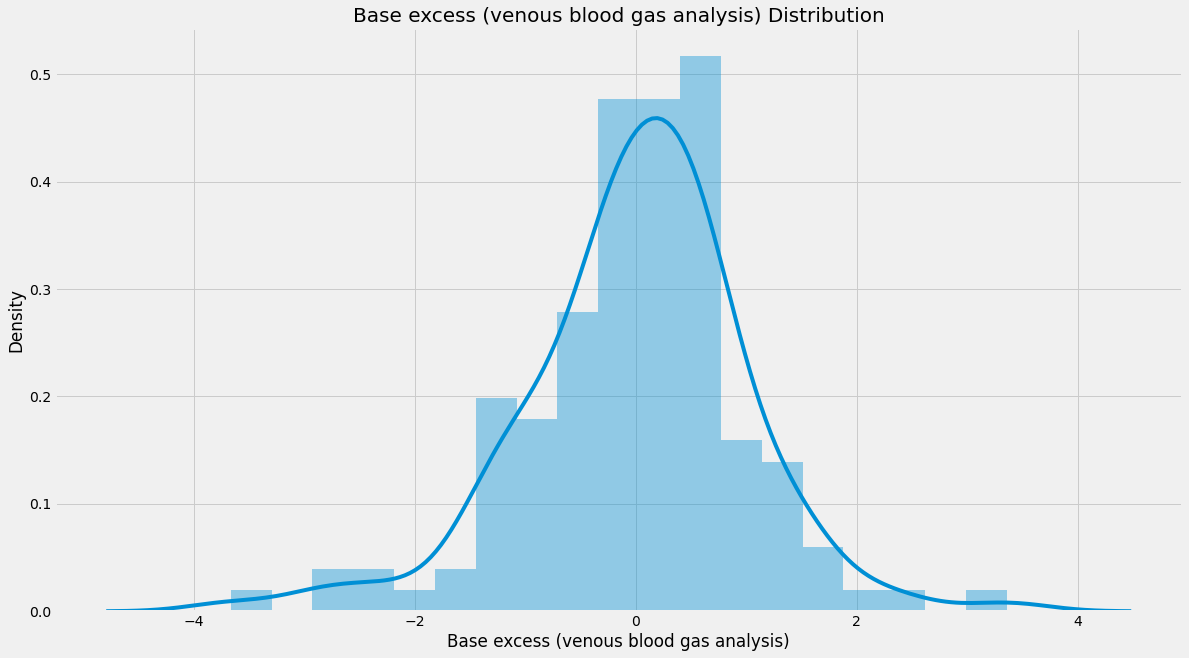

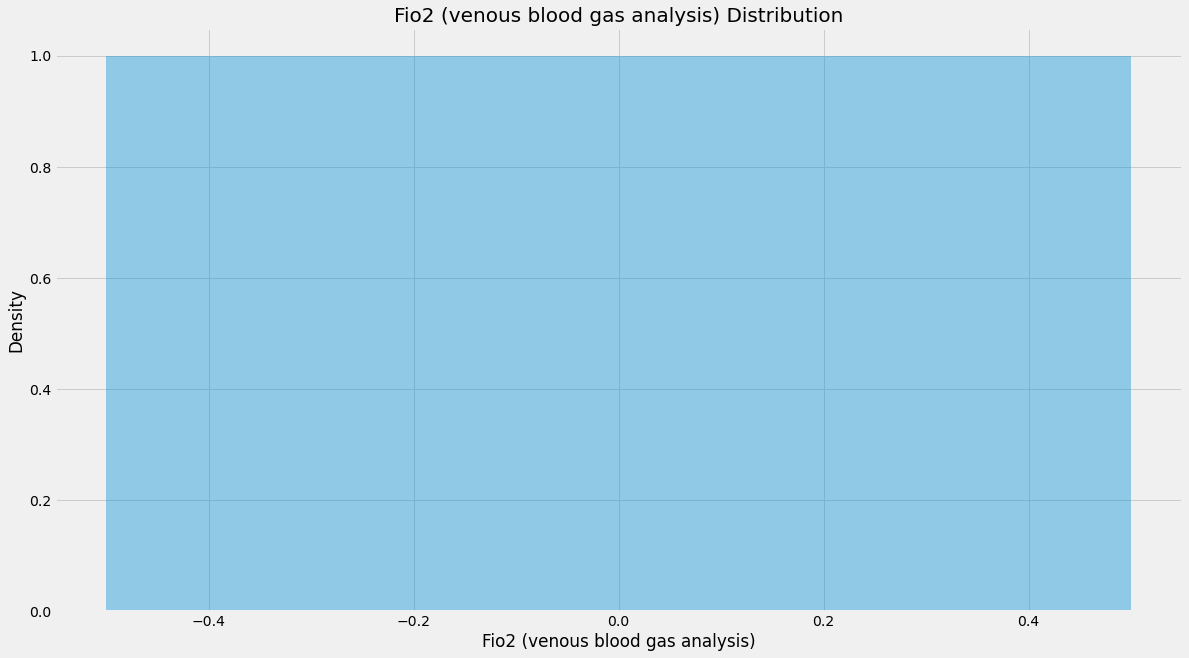

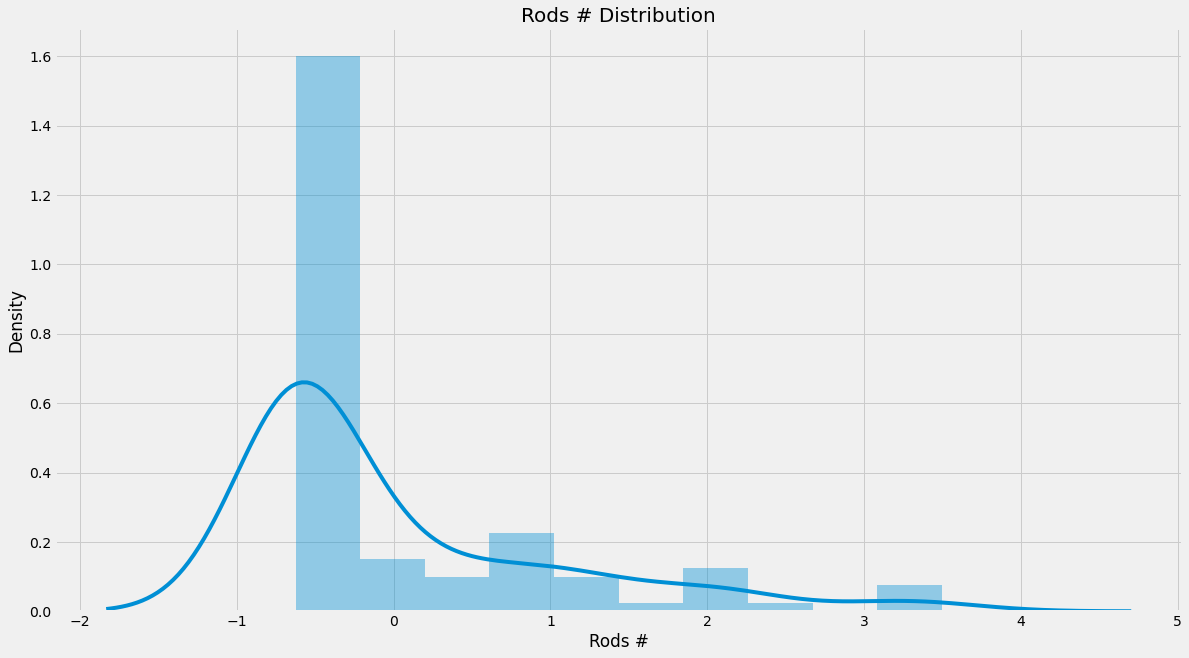

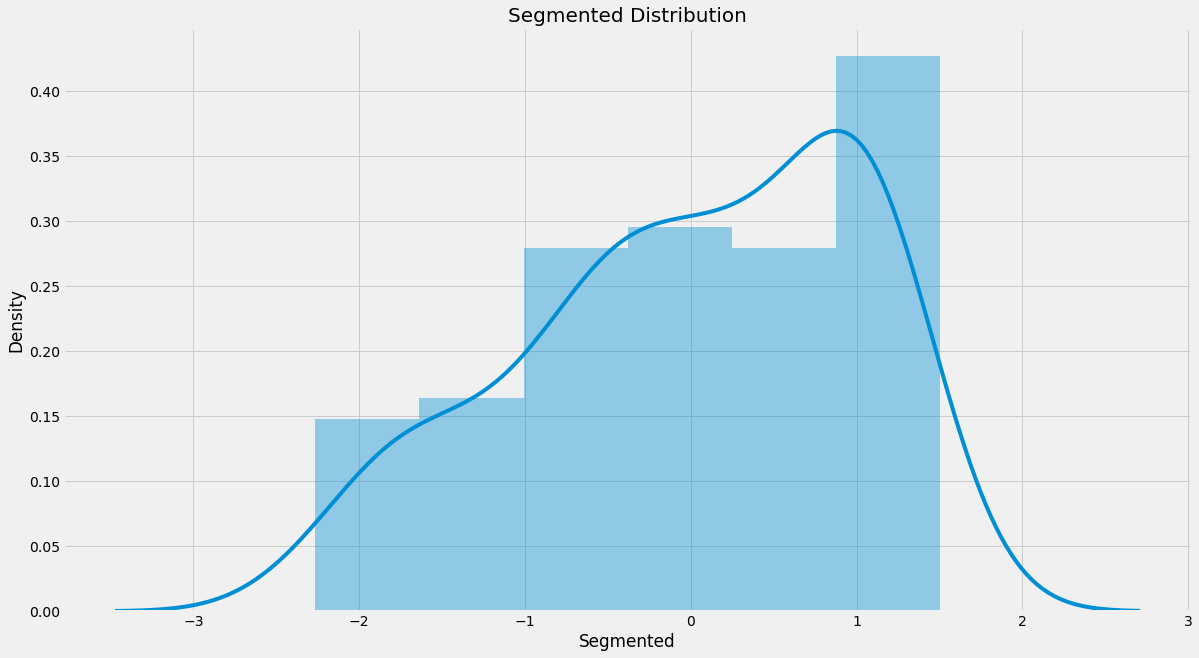

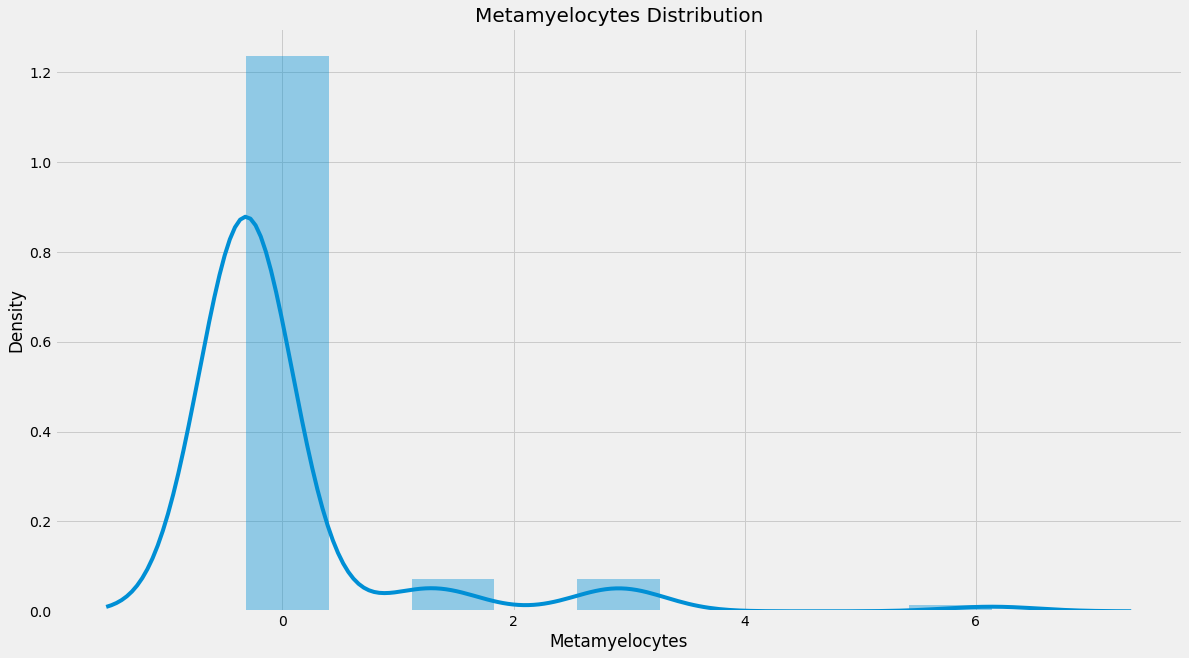

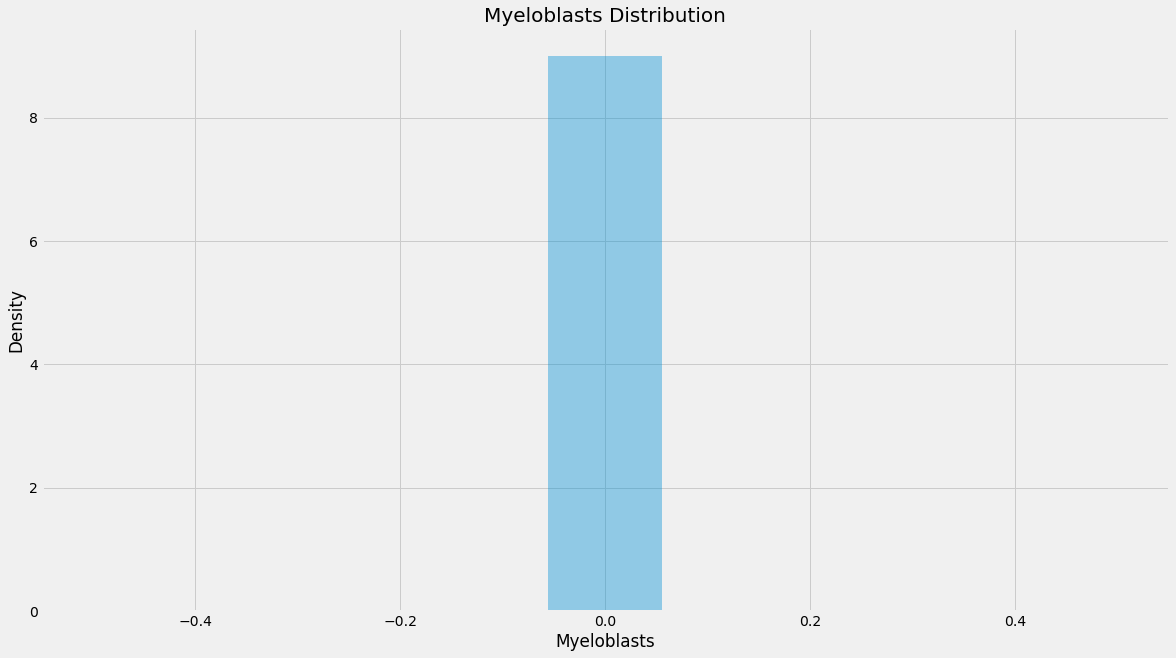

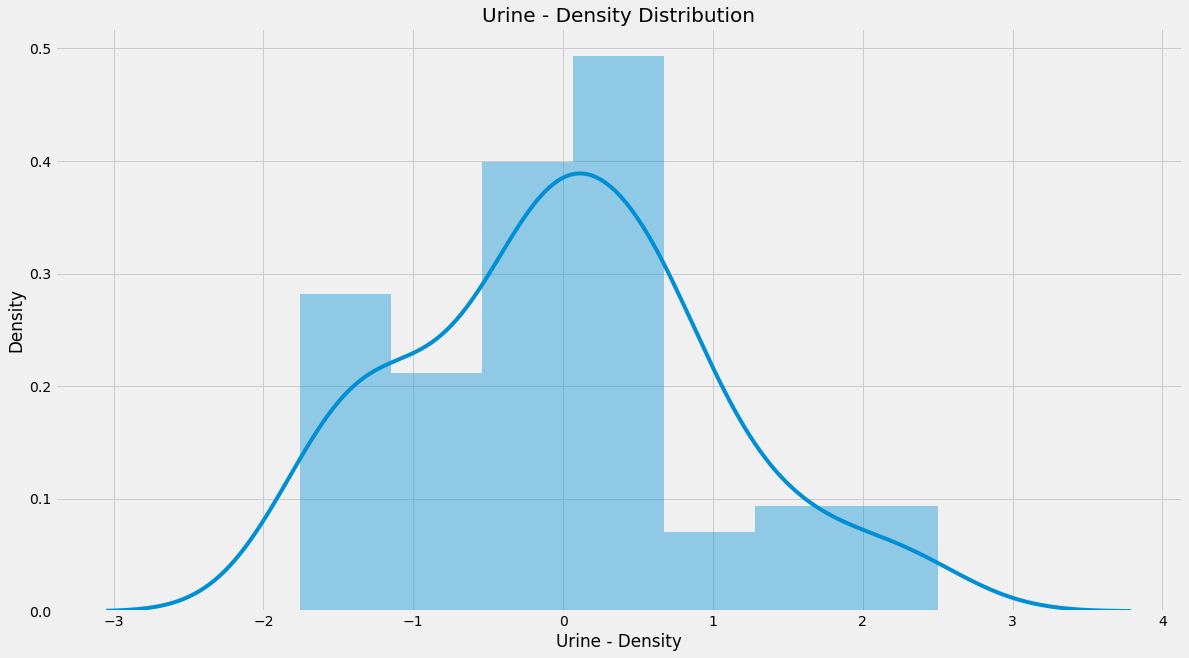

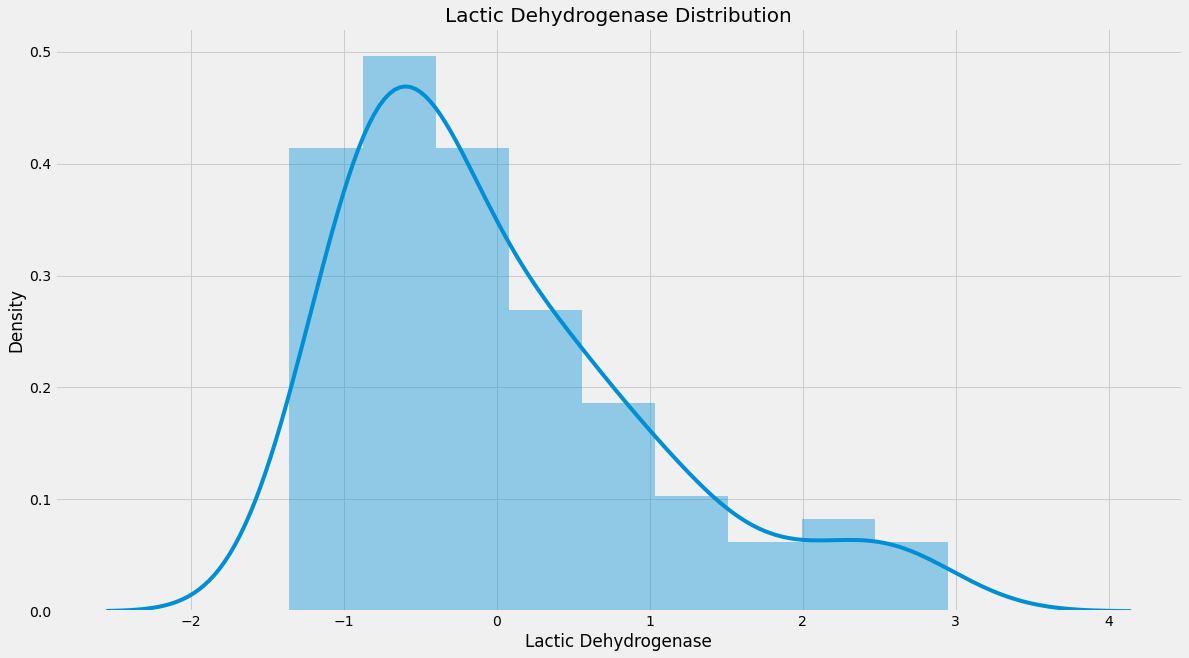

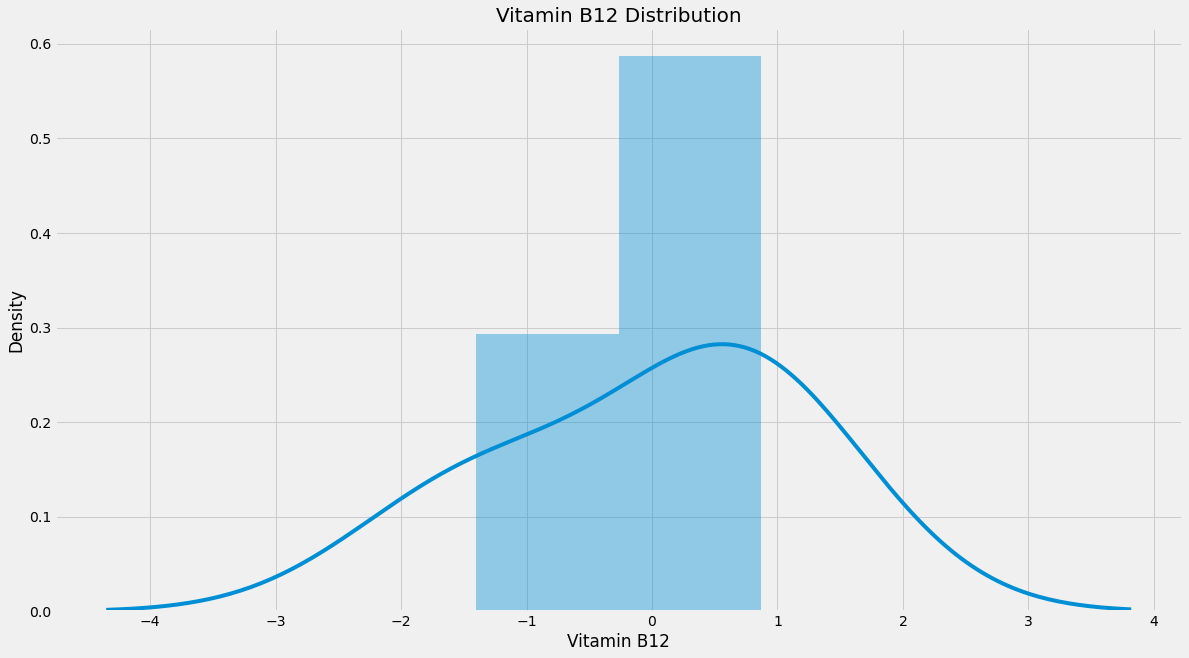

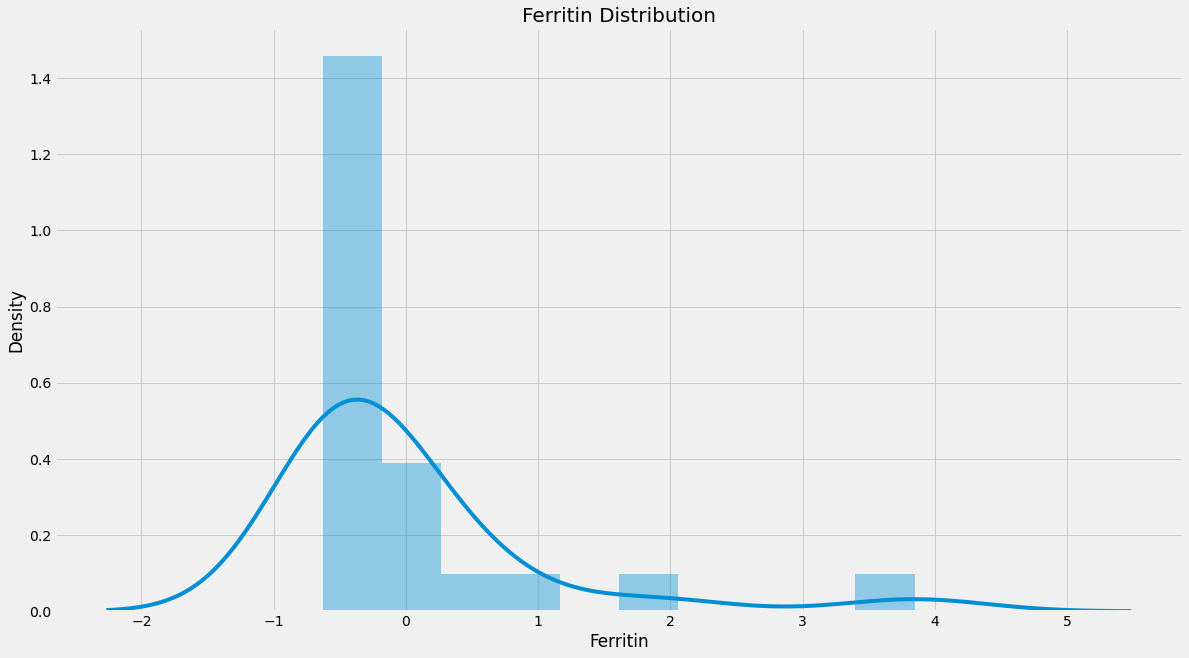

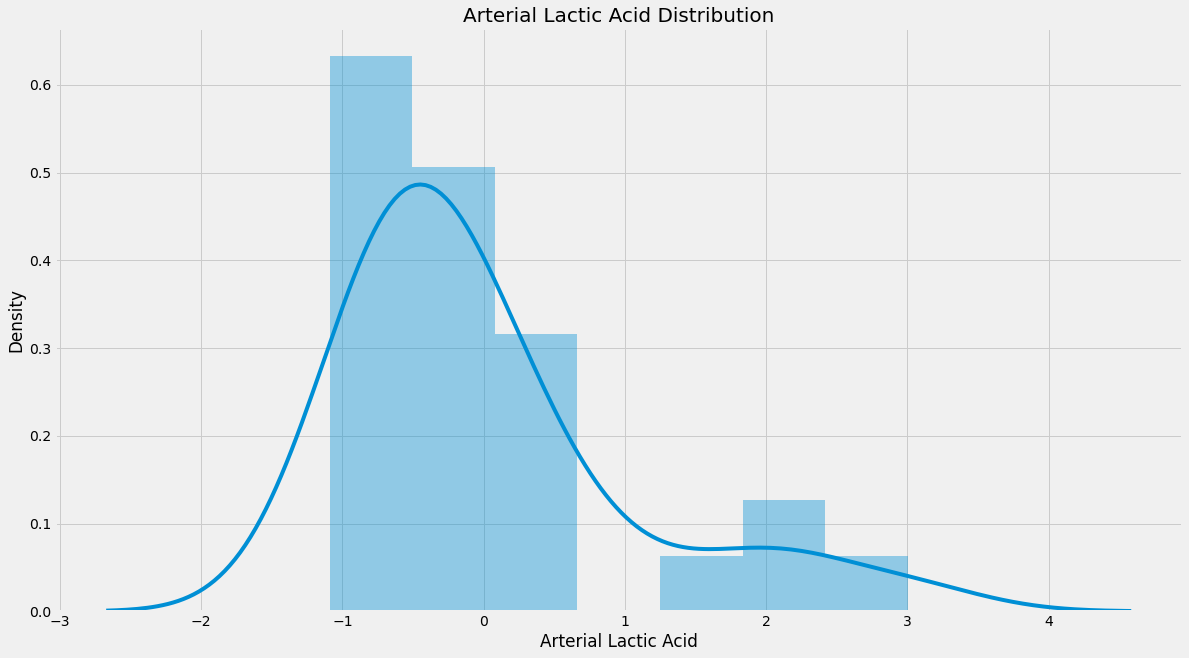

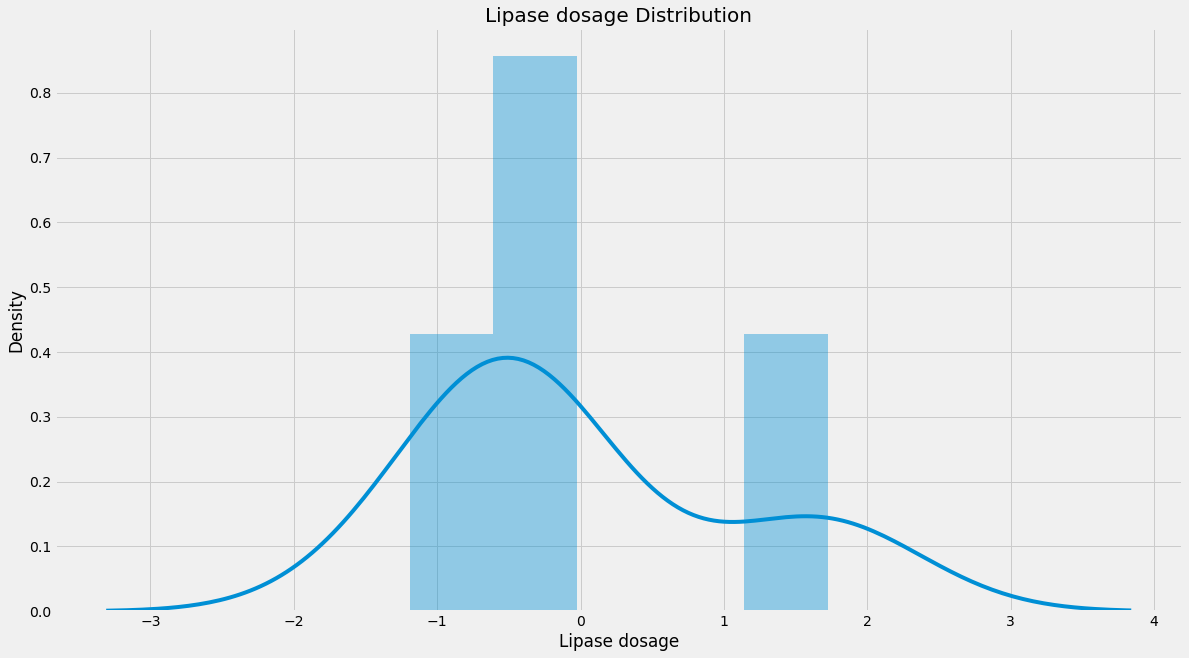

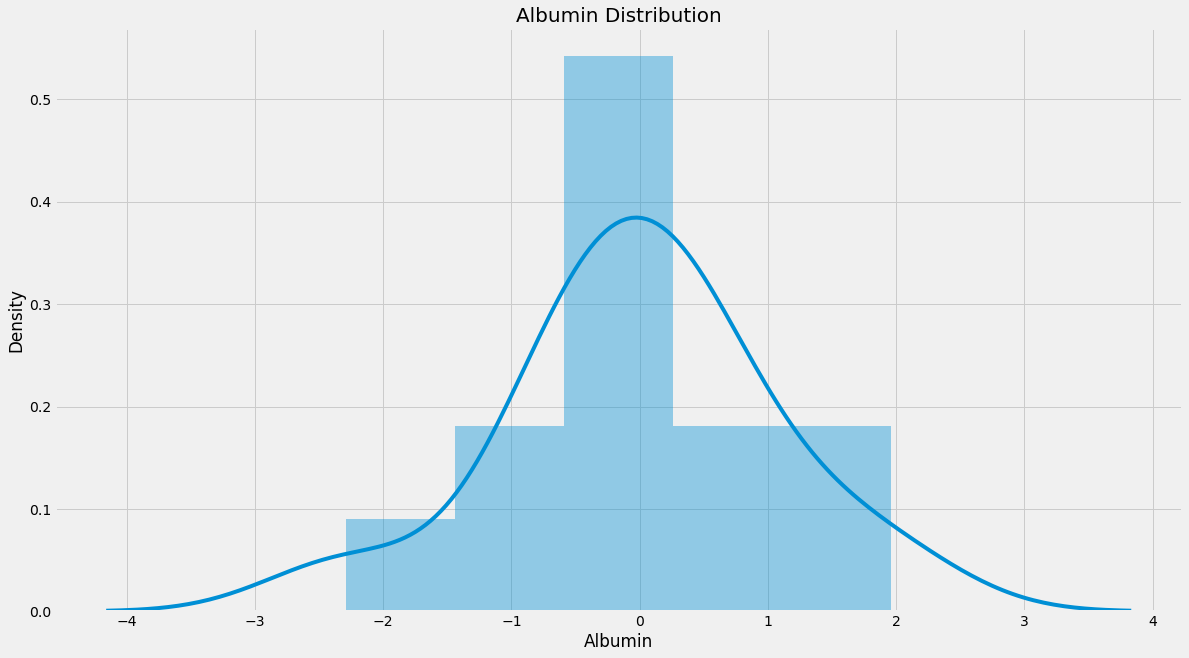

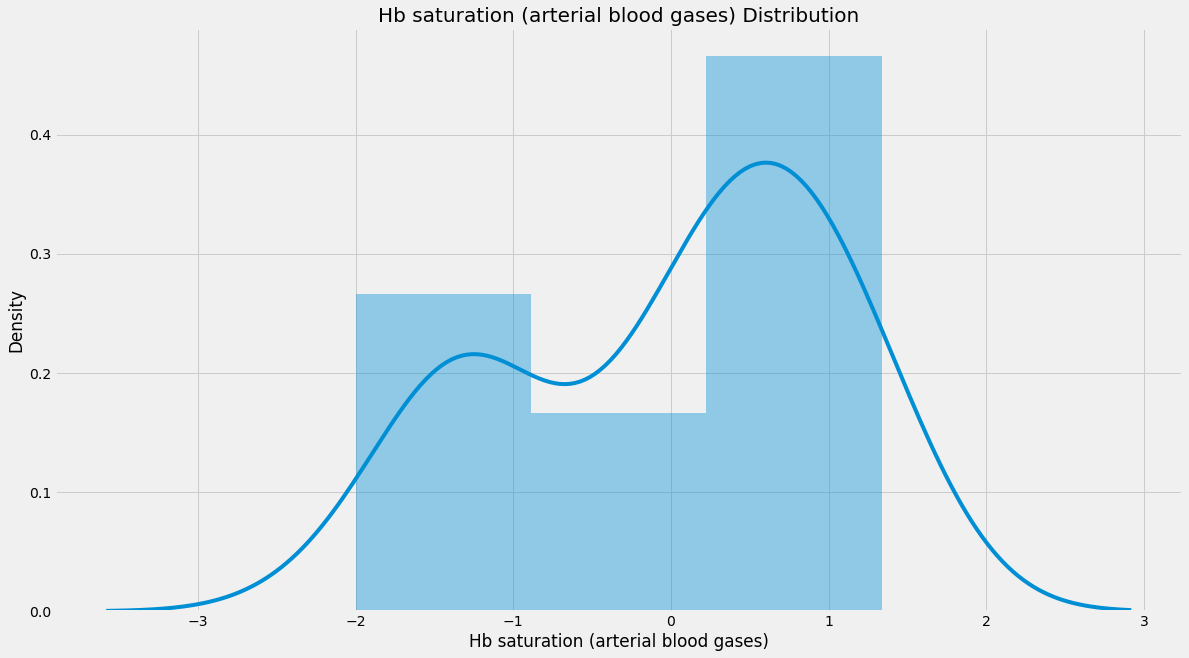

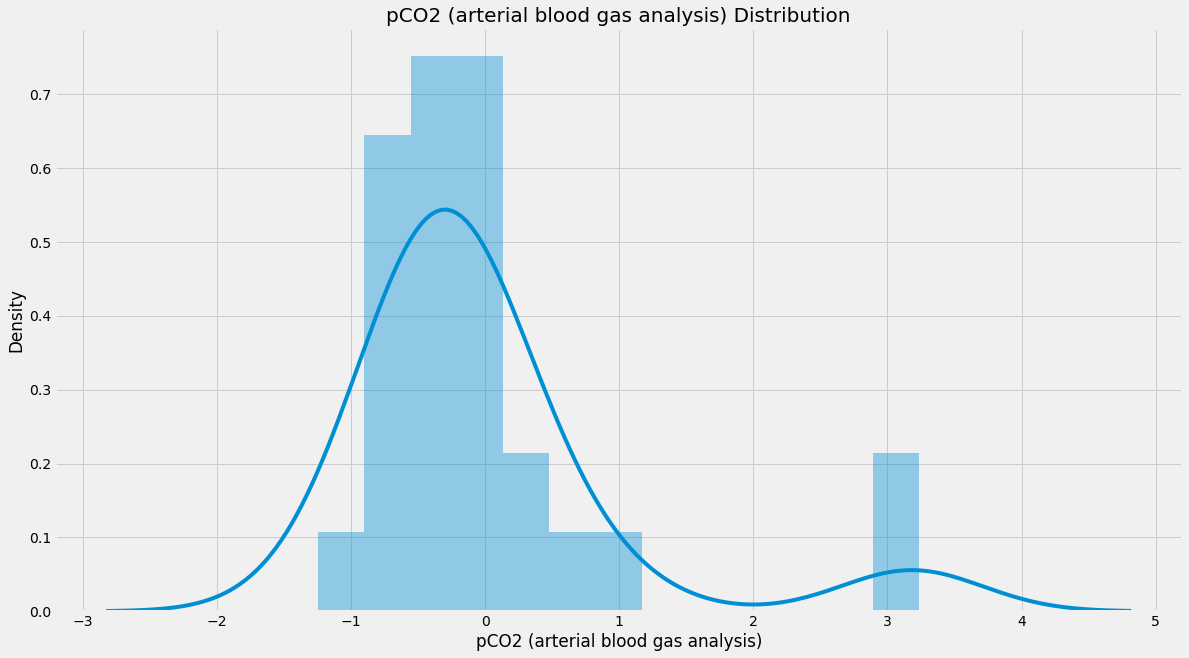

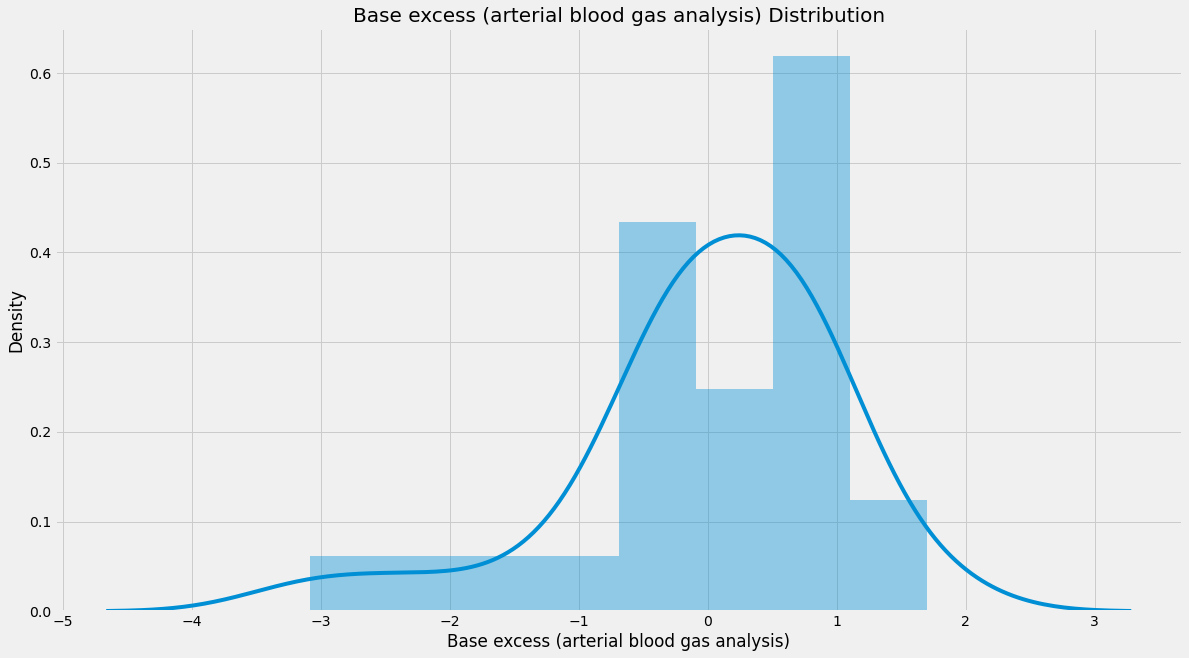

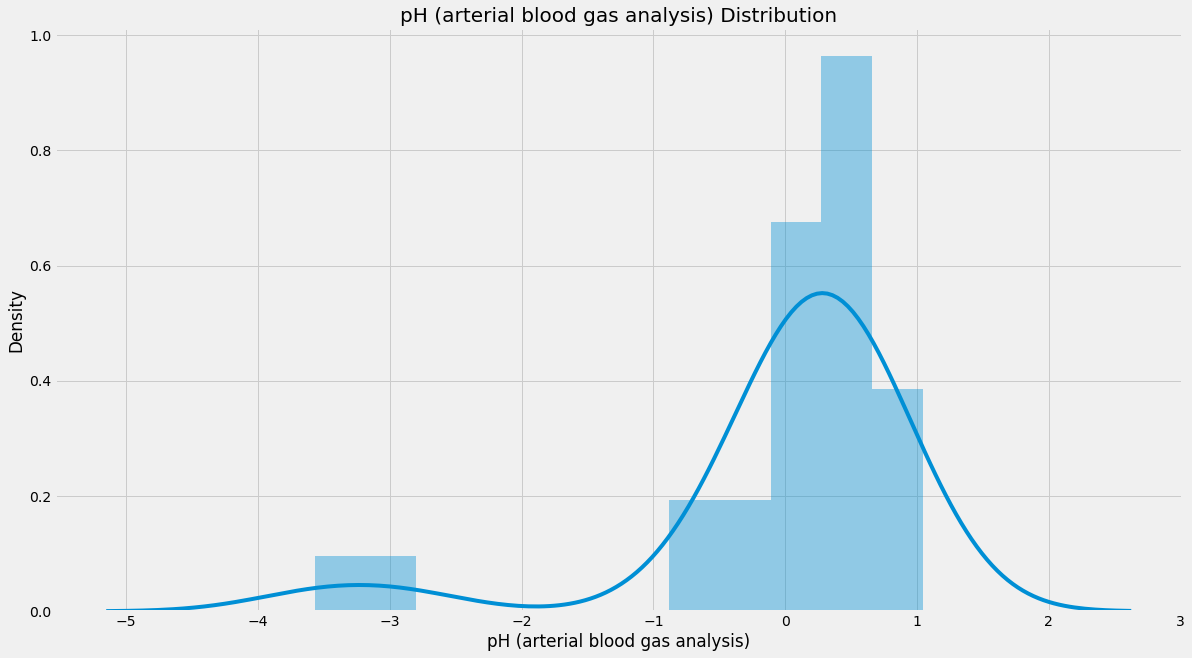

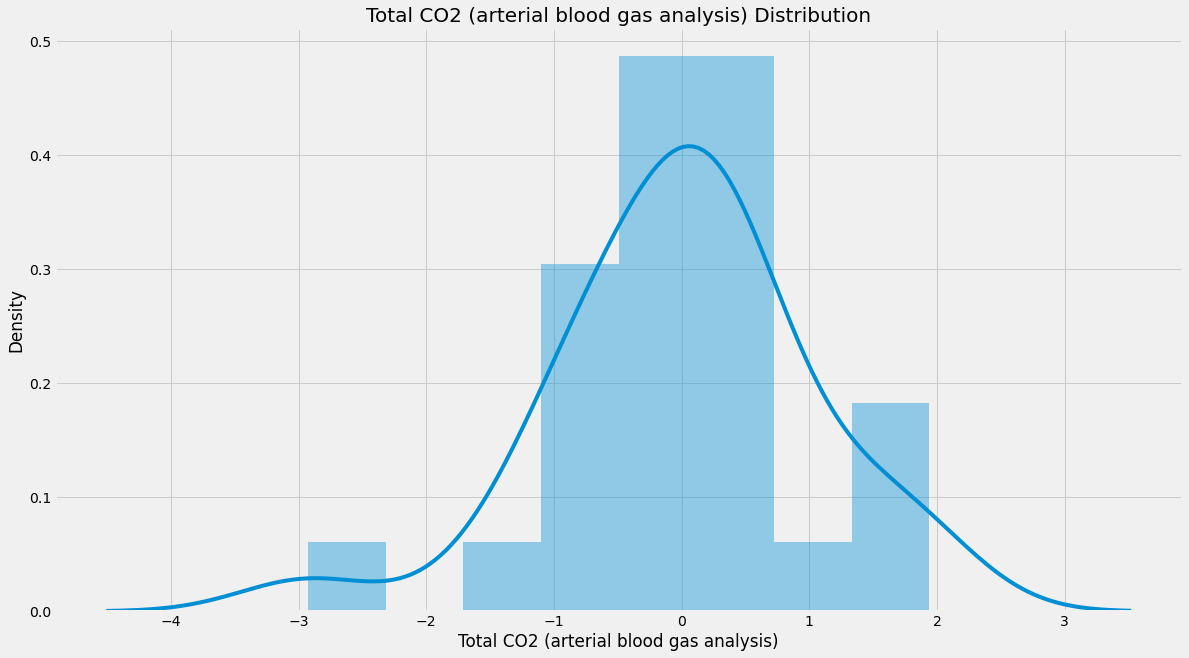

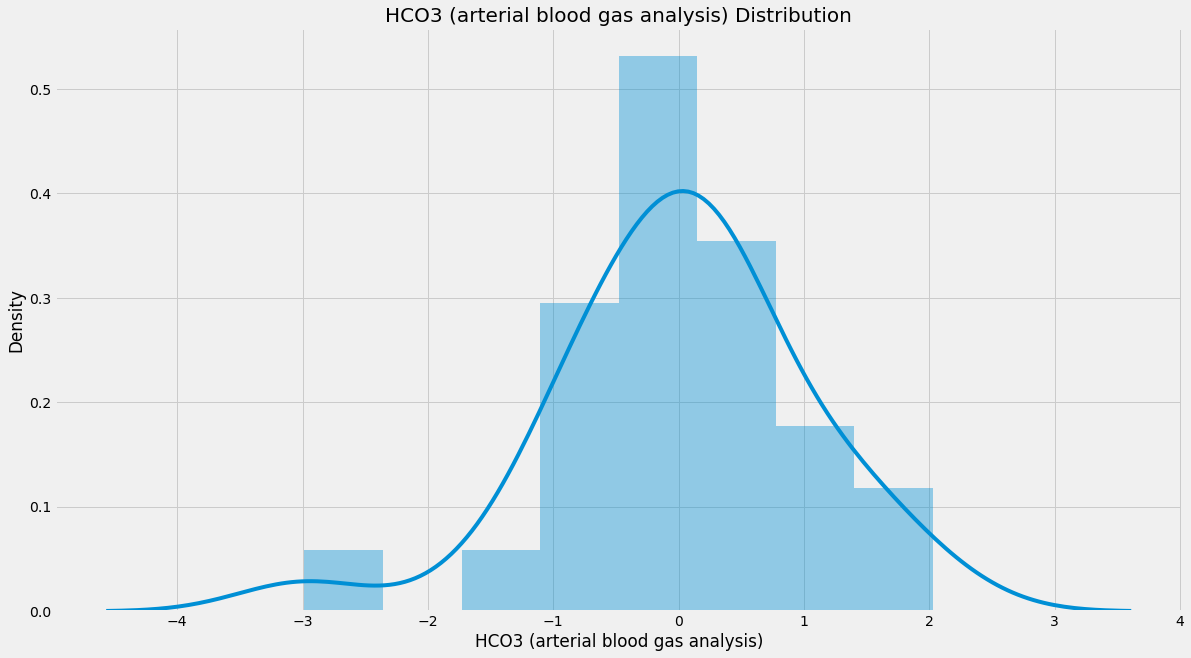

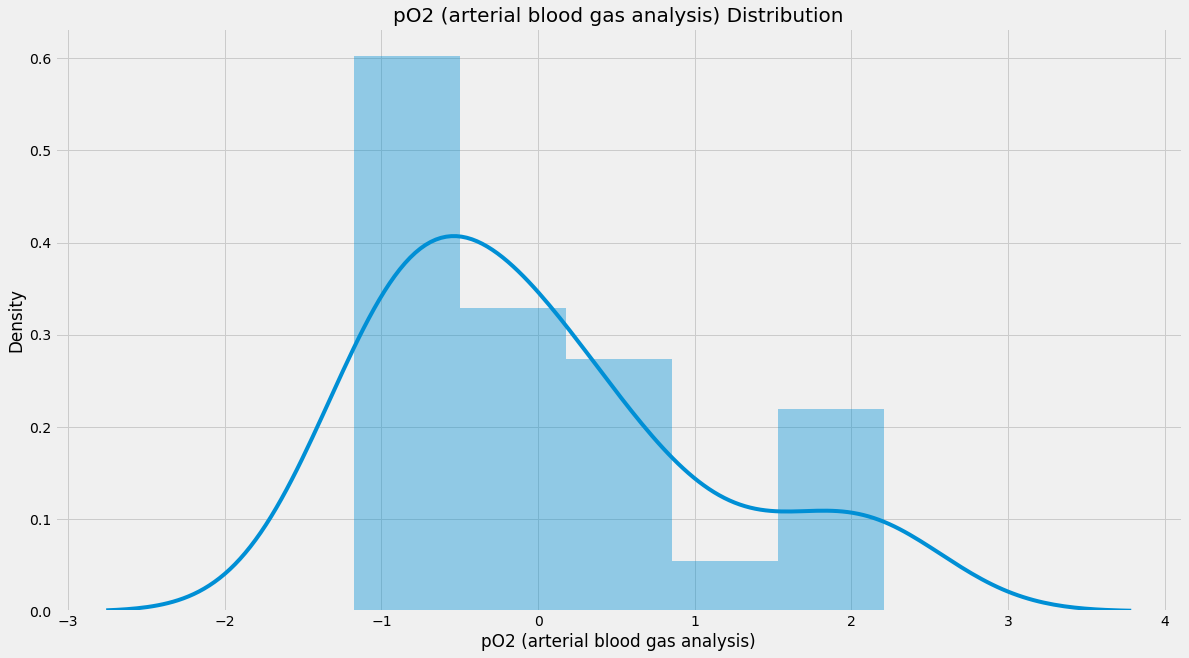

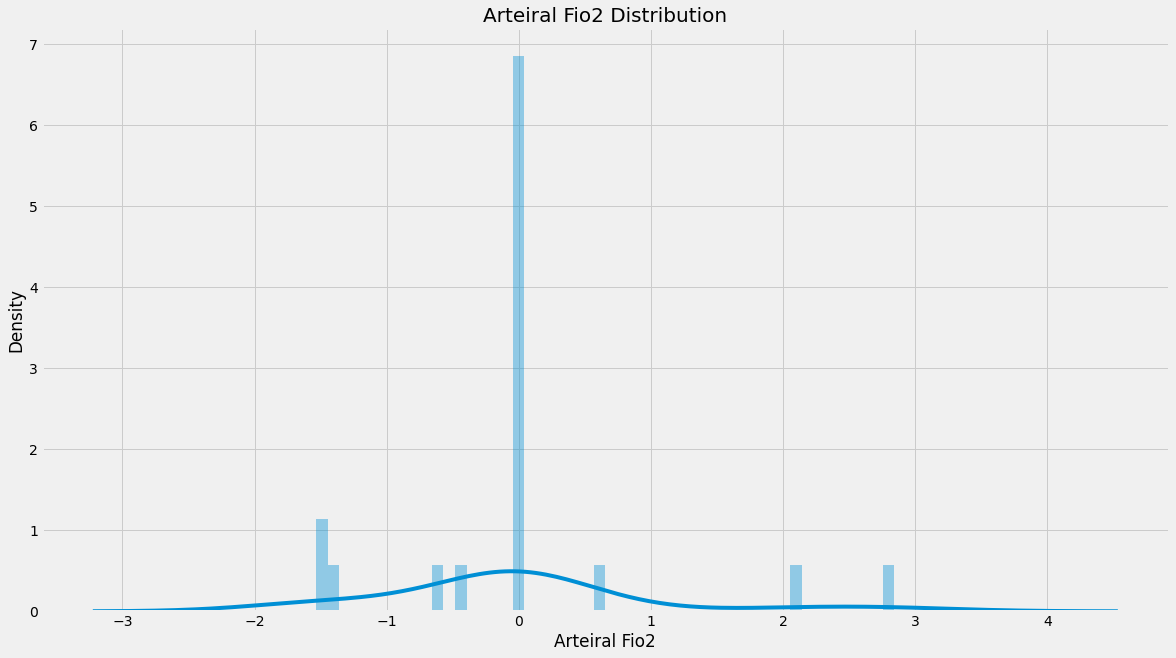

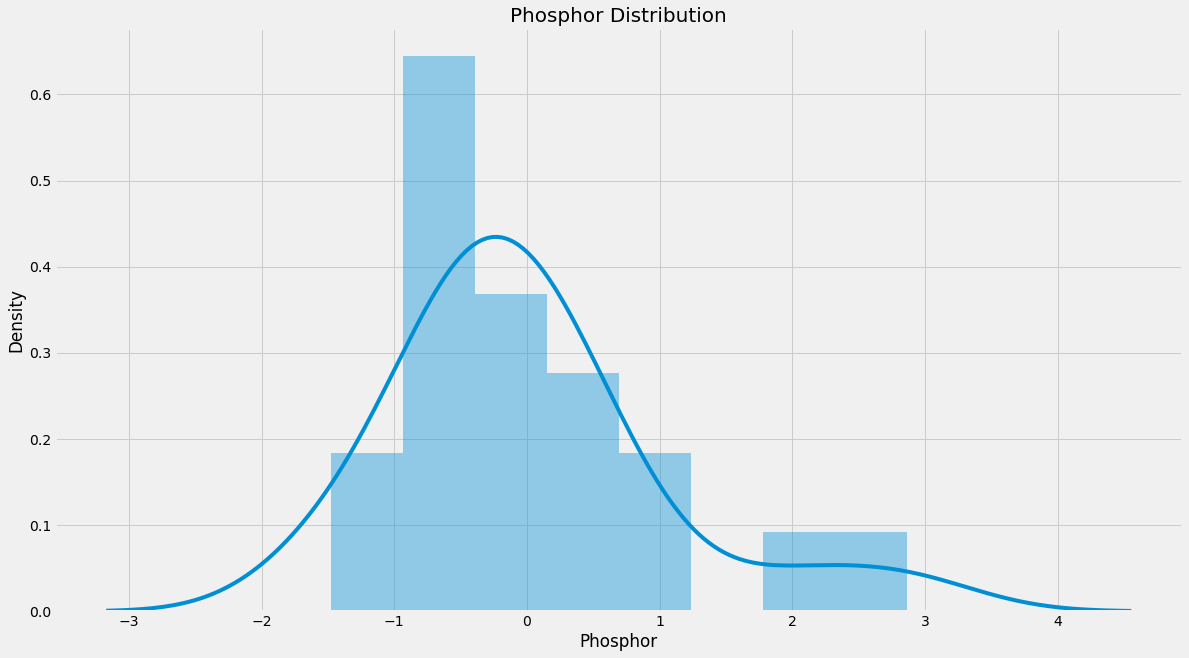

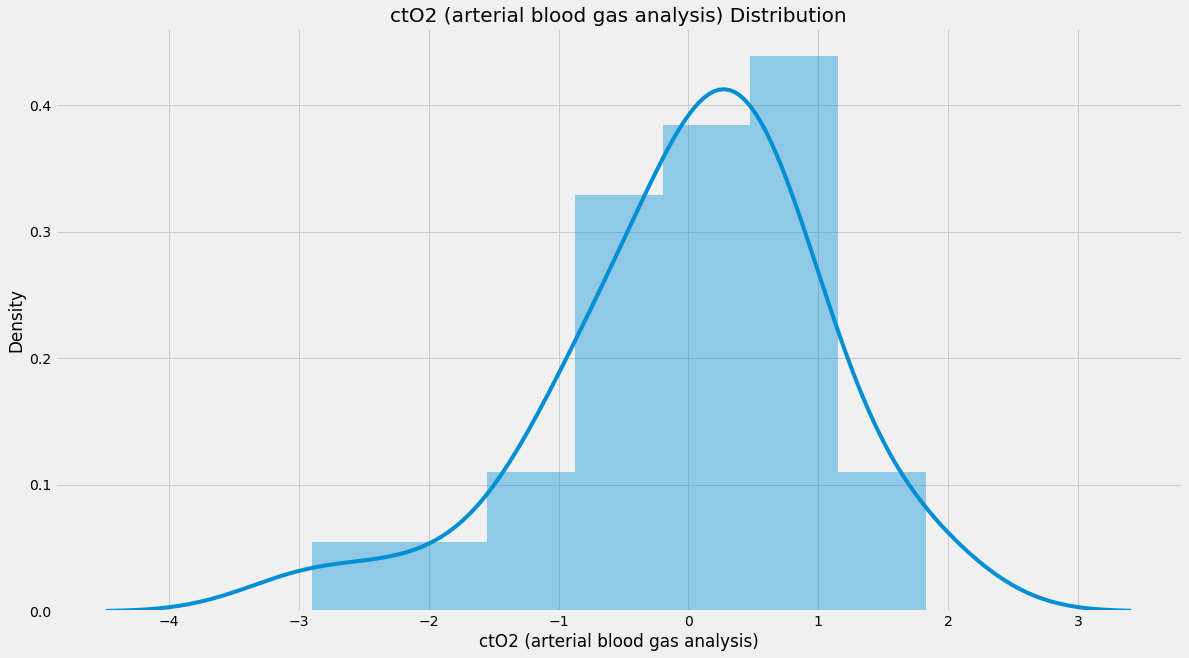

In [24]:
for feature in Covid.select_dtypes('float64'):
    plt.figure(figsize=(18,10))
    sns.distplot(Covid[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

# Corrélation

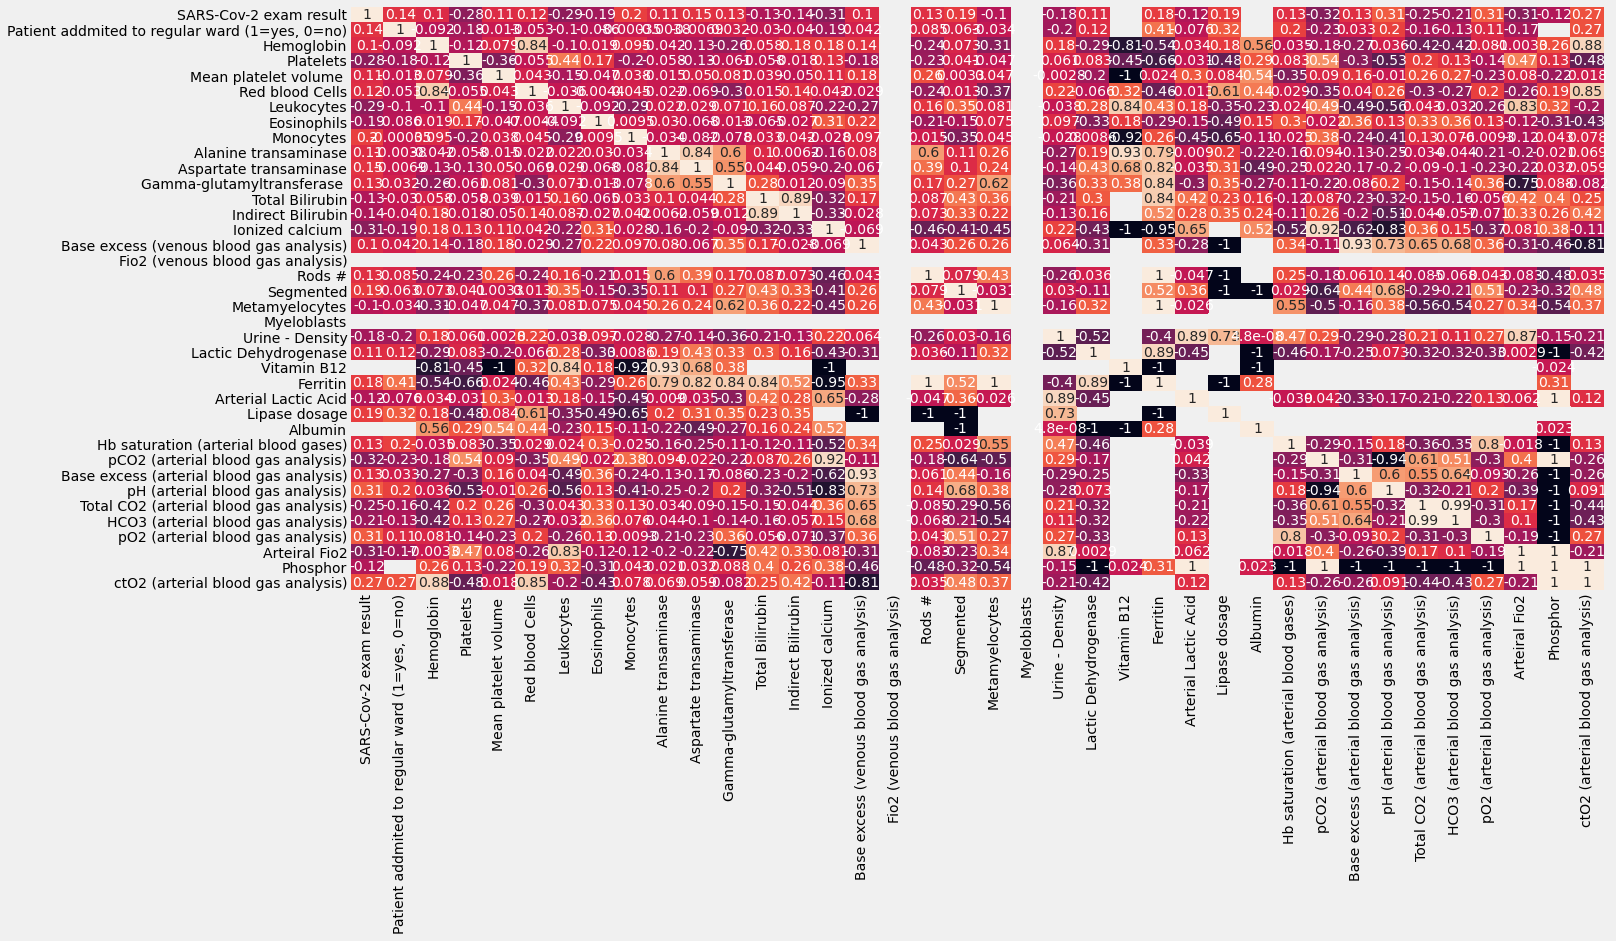

In [25]:
plt.figure(figsize=(20, 10))
sns.heatmap(Covid.corr(), annot=True, cbar=False) #
plt.show()

In [26]:
Covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


# Analyse bivariée

Text(0.5, 0, 'Leukocytes')

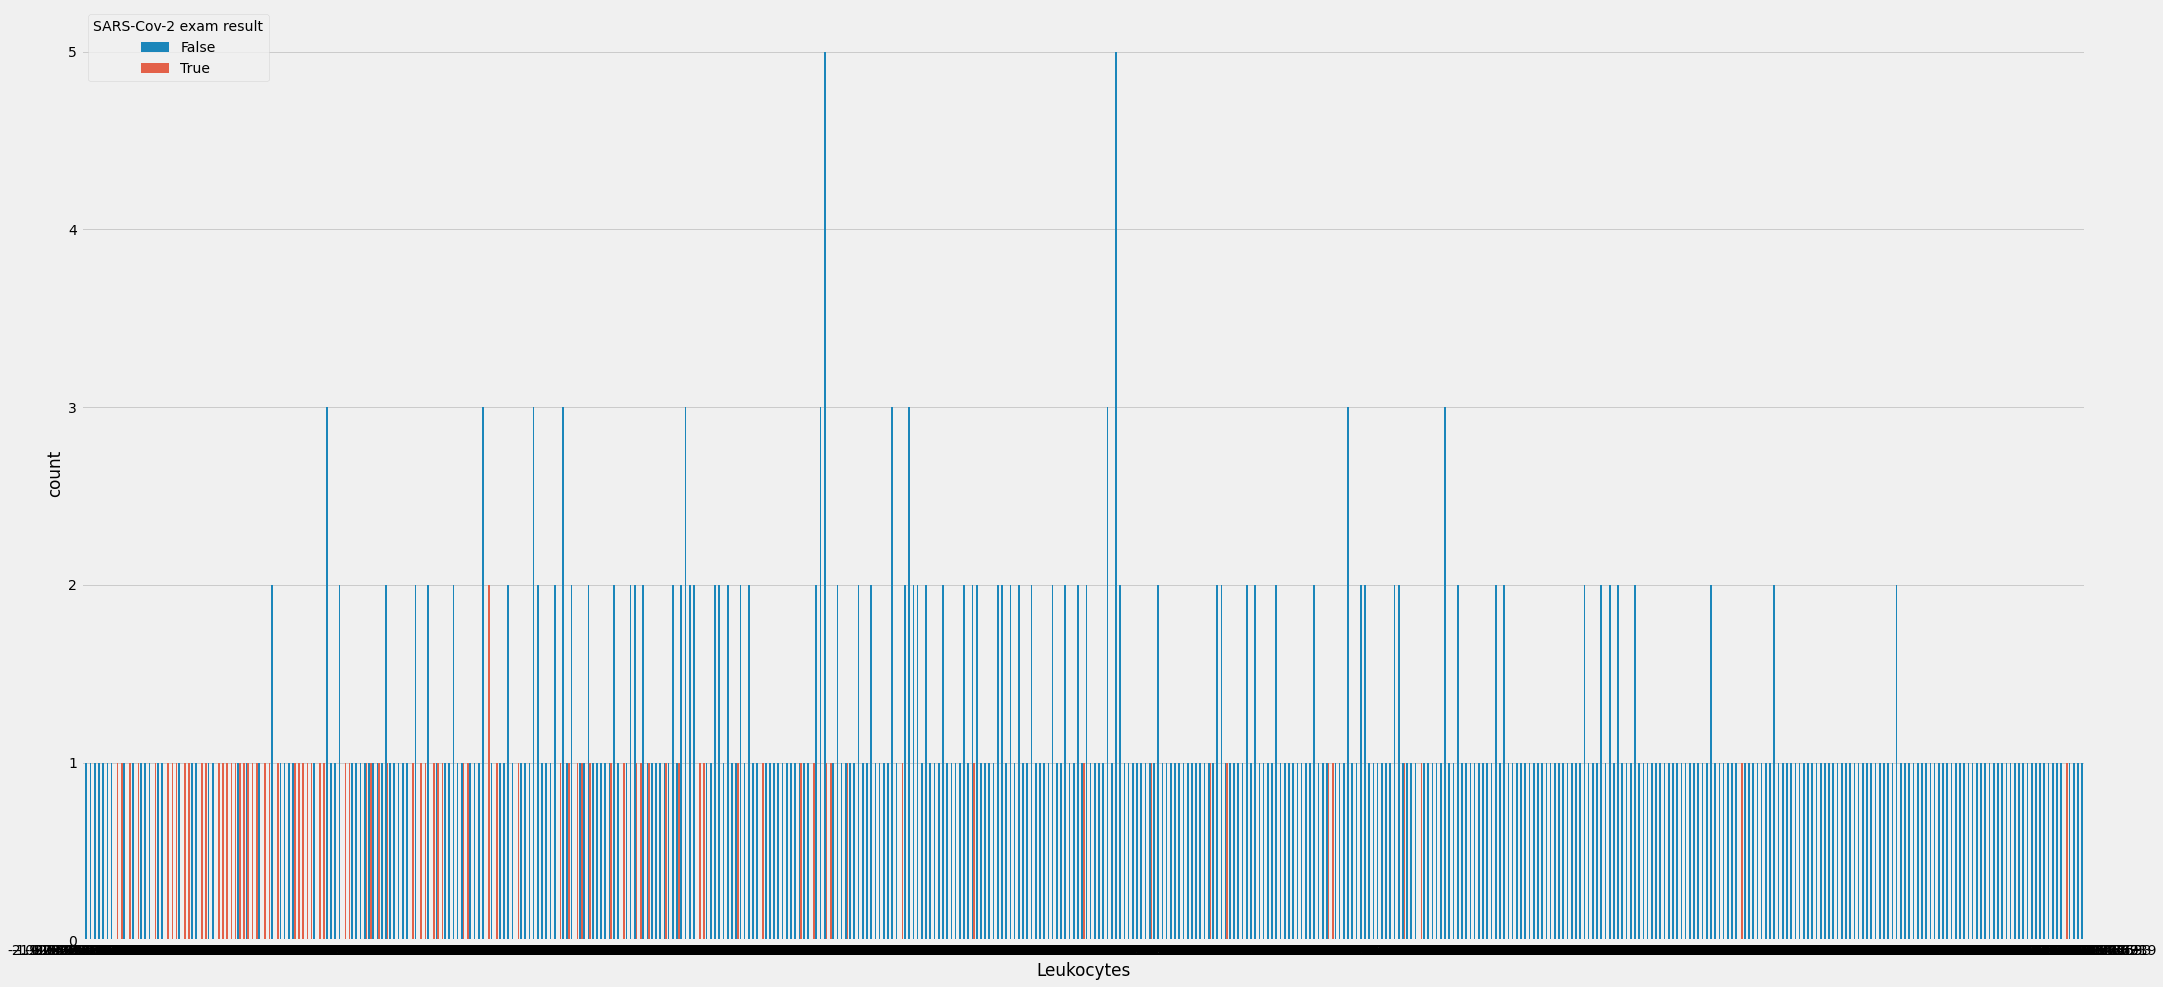

In [27]:
plt.figure(figsize=(32,16))
sns.countplot(x="Leukocytes", data=Covid, hue='SARS-Cov-2 exam result')
plt.xlabel("Leukocytes")

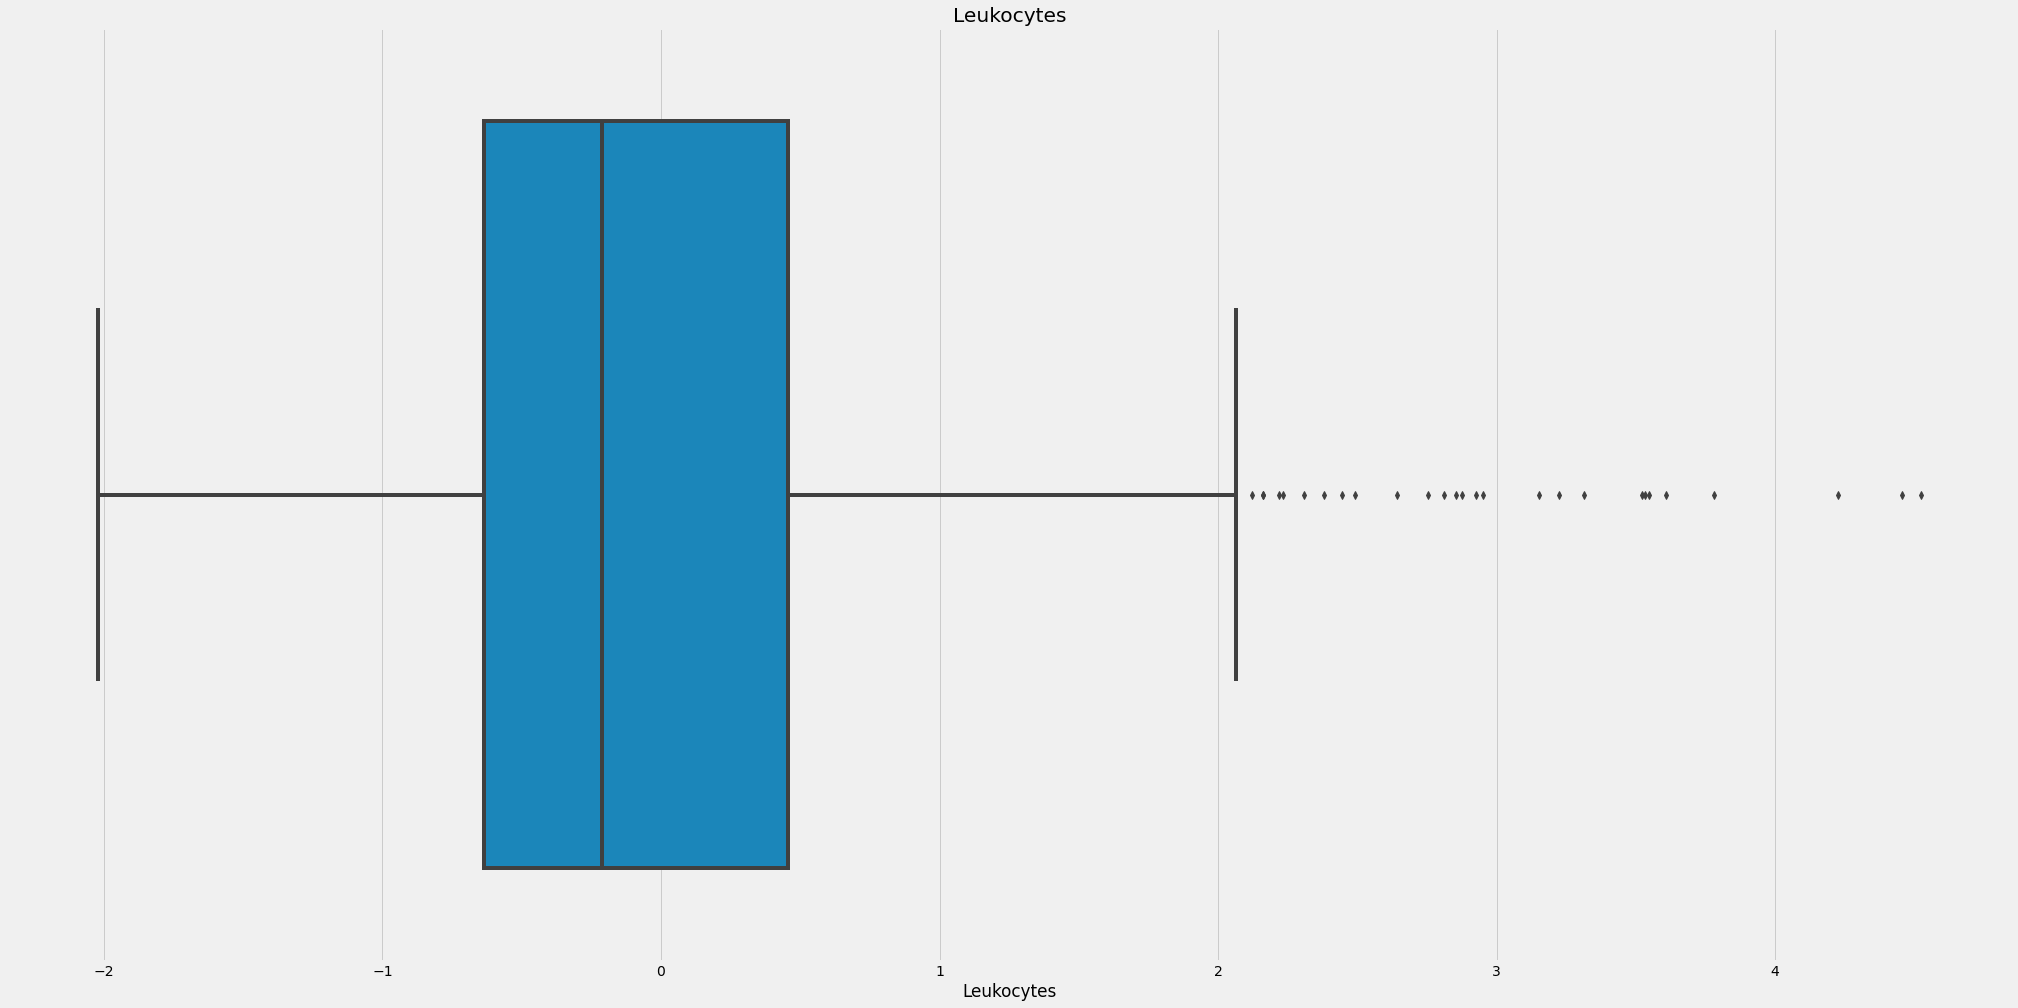

In [28]:
plt.figure(figsize=(32,16))
sns.boxplot(x='Leukocytes', data=Covid, hue='SARS-Cov-2 exam result')
plt.title("Leukocytes")
plt.show()

# Pré-Traitement

In [29]:
Covid = Covid[Covid['Leukocytes'] < 2.1]

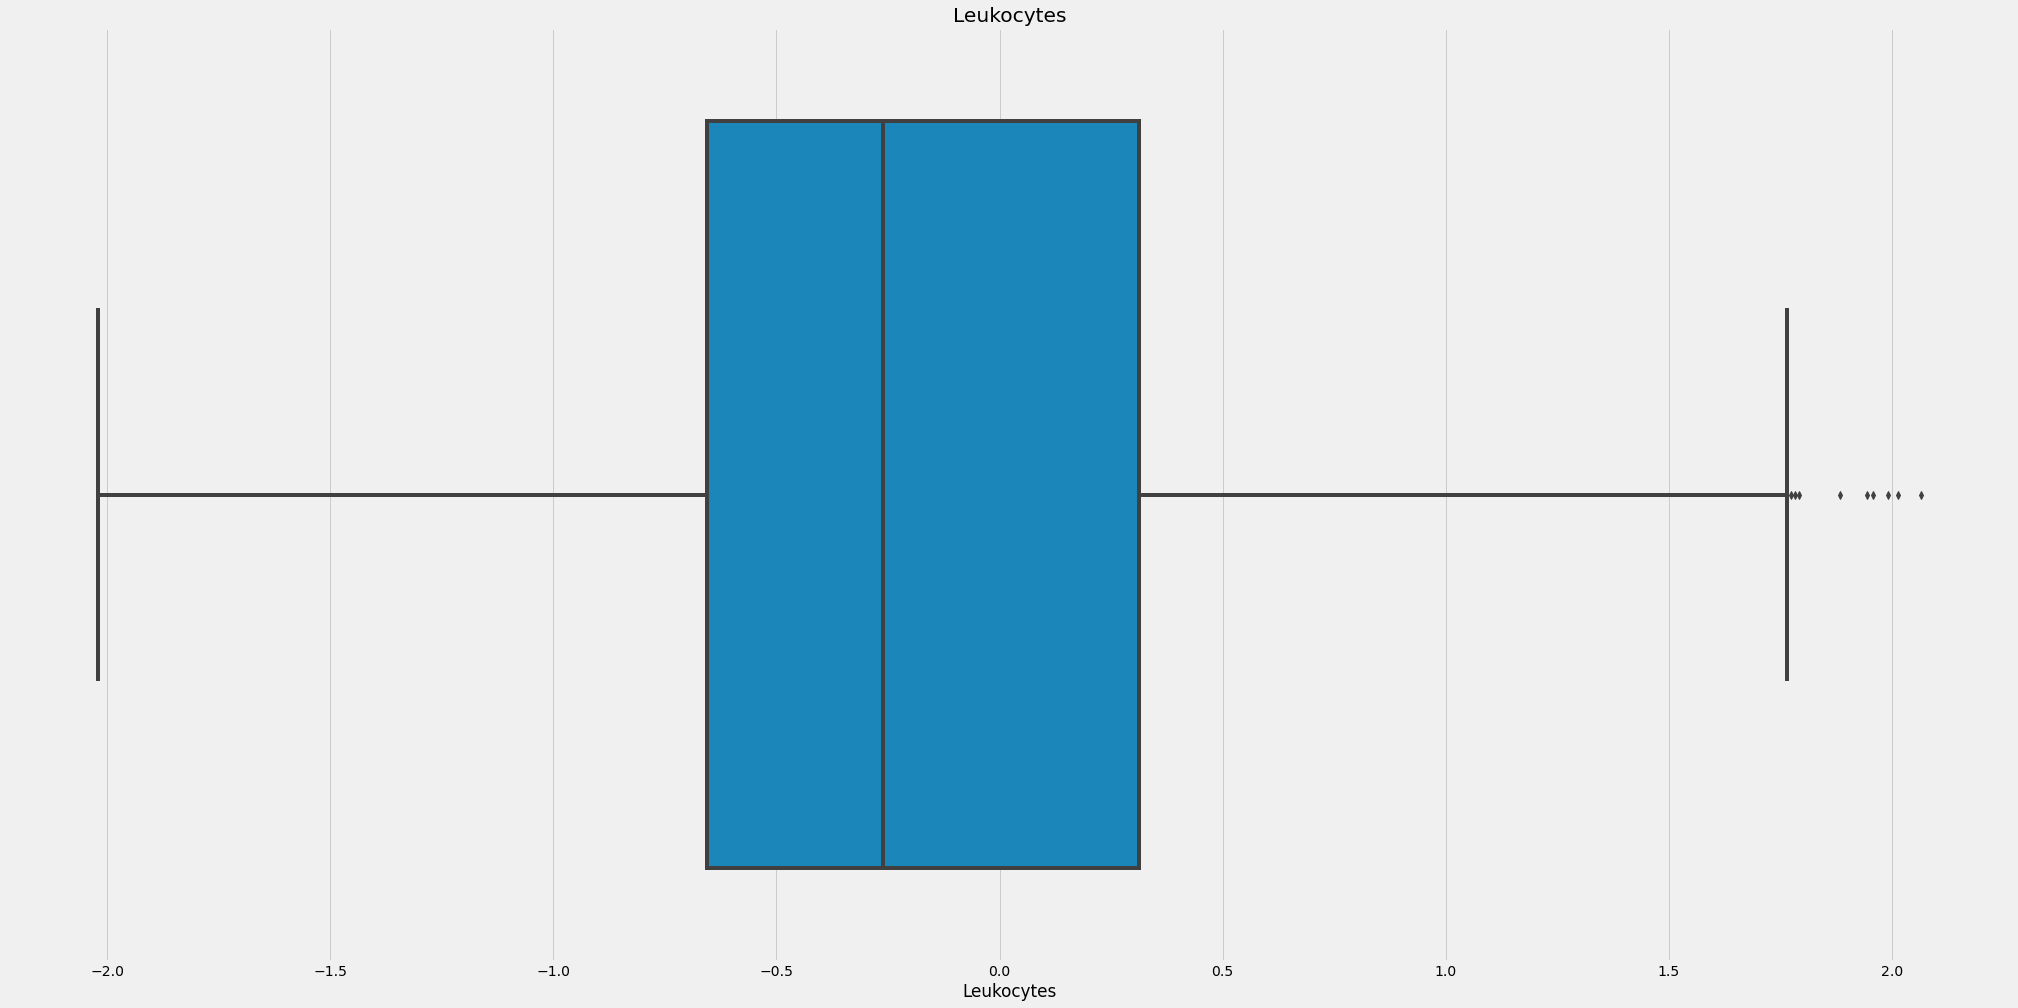

In [30]:
plt.figure(figsize=(32,16))
sns.boxplot(x='Leukocytes', data=Covid, hue='SARS-Cov-2 exam result')
plt.title("Leukocytes")
plt.show()

Text(0.5, 0, 'Leukocytes')

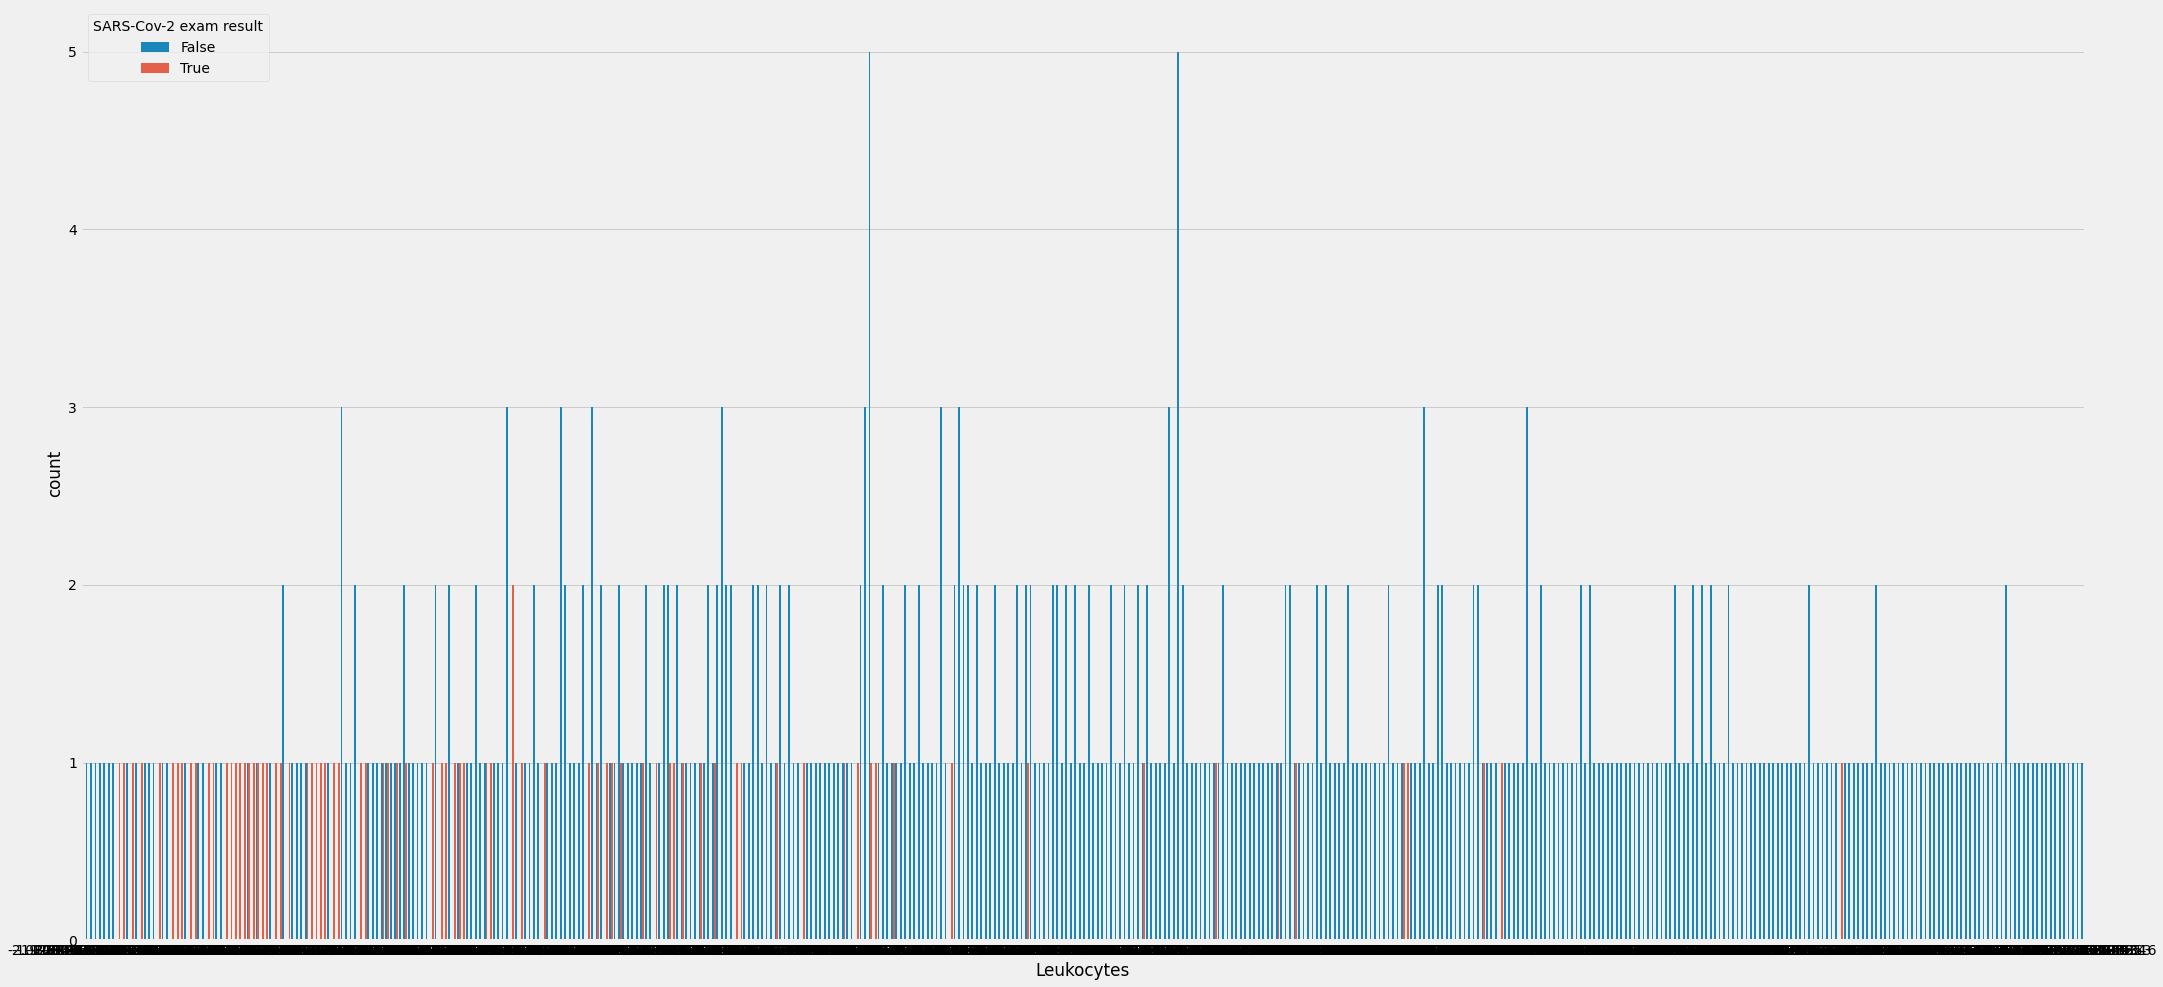

In [31]:
plt.figure(figsize=(32,16))
sns.countplot(x="Leukocytes", data=Covid, hue='SARS-Cov-2 exam result')
plt.xlabel("Leukocytes")

In [32]:
pourcentages_manquement = (Covid.isna().sum() / Covid.shape[0])
pourcentages_manquement.sort_values(ascending=False)

Fio2 (venous blood gas analysis)                  0.998261
Vitamin B12                                       0.994783
Lipase dosage                                     0.987826
Albumin                                           0.979130
Phosphor                                          0.972174
Arteiral Fio2                                     0.970435
Ferritin                                          0.963478
ctO2 (arterial blood gas analysis)                0.958261
Arterial Lactic Acid                              0.958261
Hb saturation (arterial blood gases)              0.958261
pCO2 (arterial blood gas analysis)                0.958261
Base excess (arterial blood gas analysis)         0.958261
pH (arterial blood gas analysis)                  0.958261
Total CO2 (arterial blood gas analysis)           0.958261
HCO3 (arterial blood gas analysis)                0.958261
pO2 (arterial blood gas analysis)                 0.958261
Ionized calcium                                   0.9286

In [33]:
Covid.isnull().sum().sort_values(ascending=False)

Fio2 (venous blood gas analysis)                  574
Vitamin B12                                       572
Lipase dosage                                     568
Albumin                                           563
Phosphor                                          559
Arteiral Fio2                                     558
Ferritin                                          554
ctO2 (arterial blood gas analysis)                551
Arterial Lactic Acid                              551
Hb saturation (arterial blood gases)              551
pCO2 (arterial blood gas analysis)                551
Base excess (arterial blood gas analysis)         551
pH (arterial blood gas analysis)                  551
Total CO2 (arterial blood gas analysis)           551
HCO3 (arterial blood gas analysis)                551
pO2 (arterial blood gas analysis)                 551
Ionized calcium                                   534
Urine - Density                                   527
Rods #                      

In [34]:
cat_features = Covid.select_dtypes("object", "int64").columns
cont_features = Covid.select_dtypes(include=['float64']).columns

imput_cont = SimpleImputer(missing_values=np.nan, strategy='mean')
imput_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for feature in cont_features :
    Covid[feature] = imput_cont.fit_transform(Covid[feature].values.reshape(-1,1)).ravel()
for feature in cat_features :
    Covid[feature] = imput_cat.fit_transform(Covid[feature].values.reshape(-1,1)).ravel()

# X_train, X_test, y_train, y_test

In [35]:
X = Covid.drop('SARS-Cov-2 exam result', axis=1)
y = Covid['SARS-Cov-2 exam result']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [37]:
len(y_train), len(y_test)

(460, 115)

In [38]:
(y_train==1).sum(), (y_train==0).sum(), (y_train==1).sum() / (y_train==0).sum()

(66, 394, 0.16751269035532995)

In [39]:
X_train.head()

Patient addmited to regular ward (1=yes, 0=no)  Hemoglobin  Platelets  \
3269                                               0   -1.087492   0.638273   
115                                                0   -0.147652  -0.404357   
36                                                 0   -0.335620   1.429667   
4091                                               0   -0.648900   0.876948   
2279                                               0   -0.836868   0.701083   

      Mean platelet volume   Red blood Cells  Leukocytes  Eosinophils  \
3269              -0.999063        -0.638471    0.553780    -0.203417   
115               -0.213711        -0.039039   -1.024063    -0.245556   
36                -0.213711        -0.603210    0.726313    -0.540532   
4091              -0.886869         0.031483    0.347854    -0.666950   
2279              -0.999063        -0.550319    1.235564     0.470813   

      Monocytes  Alanine transaminase  Aspartate transaminase  \
3269  -0.272770             -0.001363               -0.016771   
115    0.042388             -0.001363               -0.016771   
36     0.068652             -0.001363               -0.016771   
4091  -0.193981             -0.393869               -0.665414   
2279  -1.060667             -0.001363               -0.016771   

      Gamma-glutamyltransferase   Total Bilirubin  Indirect Bilirubin  \
3269                   -0.053272        -0.043218           -0.009563   
115                    -0.053272        -0.043218           -0.009563   
36                     -0.053272        -0.043218           -0.009563   
4091                   -0.319378        -0.174908            0.213725   
2279                   -0.053272        -0.043218           -0.009563   

      Ionized calcium   Base excess (venous blood gas analysis)  \
3269          0.092226                                 0.036739   
115           0.092226                                 1.463711   
36            0.092226                                 0.036739   
4091          0.092226                                 0.480765   
2279          0.092226                                 0.036739   

      Fio2 (venous blood gas analysis)    Rods #  Segmented  Metamyelocytes  \
3269                               0.0 -0.157124  -0.162927       -0.097981   
115                                0.0 -0.157124  -0.162927       -0.097981   
36                                 0.0 -0.157124  -0.162927       -0.097981   
4091                               0.0 -0.157124  -0.162927       -0.097981   
2279                               0.0 -0.157124  -0.162927       -0.097981   

      Myeloblasts  Urine - Density  Lactic Dehydrogenase   Vitamin B12  \
3269          0.0        -0.039951             -0.081728 -1.986821e-08   
115           0.0        -0.039951             -0.081728 -1.986821e-08   
36            0.0        -0.039951             -0.081728 -1.986821e-08   
4091          0.0        -0.039951             -0.081728 -1.986821e-08   
2279          0.0        -0.039951             -0.081728 -1.986821e-08   

      Ferritin  Arterial Lactic Acid  Lipase dosage   Albumin  \
3269 -0.156121             -0.017736       0.042079  0.044905   
115  -0.156121             -0.017736       0.042079  0.044905   
36   -0.156121             -0.017736       0.042079  0.044905   
4091 -0.156121             -0.017736       0.042079  0.044905   
2279 -0.156121             -0.017736       0.042079  0.044905   

      Hb saturation (arterial blood gases)  \
3269                              0.014656   
115                               0.014656   
36                                0.014656   
4091                              0.014656   
2279                              0.014656   

      pCO2 (arterial blood gas analysis)  \
3269                           -0.263179   
115                            -0.263179   
36                             -0.263179   
4091                           -0.263179   
2279                           -0.263179   

      

In [40]:
scale_minmax = MinMaxScaler()
scale_robust = RobustScaler()
# normaliser les données d'entrainement
for feature in cont_features:
    X_train[feature] = scale_minmax.fit_transform(X_train[feature].values.reshape(-1,1)).ravel()

In [41]:
# normaliser les donnéees de test
for feature in cont_features:
    X_test[feature] = scale_minmax.fit_transform(X_test[feature].values.reshape(-1,1)).ravel()

In [42]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=1206)

# Do the process
X_train_up, y_train_up = smt.fit_resample(X_train, y_train)

# Modélisation prédictive

In [43]:
# SCIKIT-LEARN: MODELES
from sklearn.linear_model import LogisticRegression

# models
logreg = LogisticRegression(penalty='none')
logregRidge = LogisticRegression(penalty='l2')
logregLasso = LogisticRegression(penalty='l1', solver='saga')
logregElasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.9)

In [44]:
dict_models = {"Reression logistique": logreg,
              "Regression logistique + Ridge": logregRidge,
              "Regression logistique + Lasso": logregLasso,
              "Regression logistique + Elastic Net": logregElasticNet
              }

# Prédiction et Evaluation

Régression logistique

Matrice de confusion:
[[99  0]
 [16  0]] 

Rapport de classification:
              precision    recall  f1-score   support

       False       0.86      1.00      0.93        99
        True       0.00      0.00      0.00        16

    accuracy                           0.86       115
   macro avg       0.43      0.50      0.46       115
weighted avg       0.74      0.86      0.80       115
 

Exactitude: 86.086957 



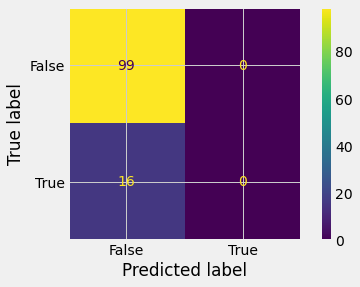

In [45]:
## régression logistique
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

Régression logistique + Ridge

Matrice de confusion:
[[98  1]
 [ 6 10]] 

Rapport de classification:
              precision    recall  f1-score   support

       False       0.94      0.99      0.97        99
        True       0.91      0.62      0.74        16

    accuracy                           0.94       115
   macro avg       0.93      0.81      0.85       115
weighted avg       0.94      0.94      0.93       115
 

Exactitude: 93.913043 



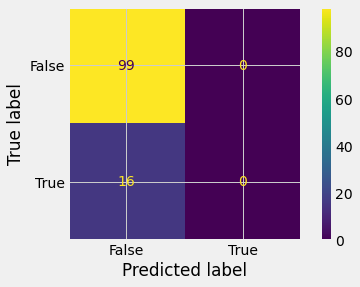

In [46]:
## régression logistique + ridge
logregRidge.fit(X_train_up, y_train_up)
y_pred = logregRidge.predict(X_test)

print('='*30)
print('Régression logistique + Ridge')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

Régression logistique + Lasso

Matrice de confusion:
[[73 26]
 [ 4 12]] 

Rapport de classification:
              precision    recall  f1-score   support

       False       0.95      0.74      0.83        99
        True       0.32      0.75      0.44        16

    accuracy                           0.74       115
   macro avg       0.63      0.74      0.64       115
weighted avg       0.86      0.74      0.78       115
 

Exactitude: 73.913043 



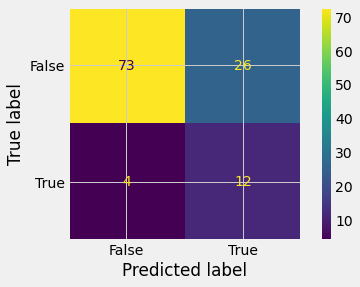

In [47]:
## régression logistique + Lasso
logregLasso.fit(X_train_up, y_train_up)
y_pred = logregLasso.predict(X_test)

print('='*30)
print('Régression logistique + Lasso')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logregLasso, X_test, y_test)
plt.show()

# Rappel (Sensibilité) et spécificité de la régression

In [48]:
## régression logistique
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensibilite = TP / float(TP+FN)
specificite = TN / float(TN+FP)

In [49]:
print('Exactitude = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Erreur de classification= 1- Exactitude= ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensibilité (True Positive Rate) = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificité (True Negative Rate) = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Précision (Positive Predictive value) = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n')

Exactitude = TP+TN/(TP+TN+FP+FN) =  0.8608695652173913 
 Erreur de classification= 1- Exactitude=  0.13913043478260867 
 Sensibilité (True Positive Rate) = TP/(TP+FN) =  0.0 
 Specificité (True Negative Rate) = TN/(TN+FP) =  1.0 
 Précision (Positive Predictive value) = TP/(TP+FP) =  nan 
 Negative predictive Value = TN/(TN+FN) =  0.8608695652173913 



In [50]:
y_pred_prob = logreg.predict_proba(X_test)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob de mort (0)','Prob de survie (1)'])
y_pred_prob_df.head()

Prob de mort (0)  Prob de survie (1)
0               1.0        3.130068e-20
1               1.0        1.232316e-22
2               1.0        9.628958e-18
3               1.0        1.332527e-19
4               1.0        2.115984e-17

In [51]:
param_grid = {'C': [1, 10, 100, 1000], 'max_iter': range(100)}
grid = GridSearchCV(logreg, param_grid, verbose=10, n_jobs=1, return_train_score=True)
# attention n_jobs=-1 va utiliser tous les CPUs
grid.fit(X_train_up, y_train_up)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5; 1/400] START C=1, max_iter=0...........................................
[CV 1/5; 1/400] END .........................C=1, max_iter=0; total time=   0.0s
[CV 2/5; 1/400] START C=1, max_iter=0...........................................
[CV 2/5; 1/400] END .........................C=1, max_iter=0; total time=   0.0s
[CV 3/5; 1/400] START C=1, max_iter=0...........................................
[CV 3/5; 1/400] END .........................C=1, max_iter=0; total time=   0.0s
[CV 4/5; 1/400] START C=1, max_iter=0...........................................
[CV 4/5; 1/400] END .........................C=1, max_iter=0; total time=   0.0s
[CV 5/5; 1/400] START C=1, max_iter=0...........................................
[CV 5/5; 1/400] END .........................C=1, max_iter=0; total time=   0.0s
[CV 1/5; 2/400] START C=1, max_iter=1...........................................
[CV 1/5; 2/400] END .........................

[CV 1/5; 12/400] END .......................C=1, max_iter=11; total time=   0.0s
[CV 2/5; 12/400] START C=1, max_iter=11.........................................
[CV 2/5; 12/400] END .......................C=1, max_iter=11; total time=   0.0s
[CV 3/5; 12/400] START C=1, max_iter=11.........................................
[CV 3/5; 12/400] END .......................C=1, max_iter=11; total time=   0.0s
[CV 4/5; 12/400] START C=1, max_iter=11.........................................
[CV 4/5; 12/400] END .......................C=1, max_iter=11; total time=   0.0s
[CV 5/5; 12/400] START C=1, max_iter=11.........................................
[CV 5/5; 12/400] END .......................C=1, max_iter=11; total time=   0.0s
[CV 1/5; 13/400] START C=1, max_iter=12.........................................
[CV 1/5; 13/400] END .......................C=1, max_iter=12; total time=   0.0s
[CV 2/5; 13/400] START C=1, max_iter=12.........................................
[CV 2/5; 13/400] END .......

[CV 3/5; 22/400] END .......................C=1, max_iter=21; total time=   0.0s
[CV 4/5; 22/400] START C=1, max_iter=21.........................................
[CV 4/5; 22/400] END .......................C=1, max_iter=21; total time=   0.0s
[CV 5/5; 22/400] START C=1, max_iter=21.........................................
[CV 5/5; 22/400] END .......................C=1, max_iter=21; total time=   0.0s
[CV 1/5; 23/400] START C=1, max_iter=22.........................................
[CV 1/5; 23/400] END .......................C=1, max_iter=22; total time=   0.0s
[CV 2/5; 23/400] START C=1, max_iter=22.........................................
[CV 2/5; 23/400] END .......................C=1, max_iter=22; total time=   0.0s
[CV 3/5; 23/400] START C=1, max_iter=22.........................................
[CV 3/5; 23/400] END .......................C=1, max_iter=22; total time=   0.0s
[CV 4/5; 23/400] START C=1, max_iter=22.........................................
[CV 4/5; 23/400] END .......

[CV 2/5; 33/400] END .......................C=1, max_iter=32; total time=   0.0s
[CV 3/5; 33/400] START C=1, max_iter=32.........................................
[CV 3/5; 33/400] END .......................C=1, max_iter=32; total time=   0.0s
[CV 4/5; 33/400] START C=1, max_iter=32.........................................
[CV 4/5; 33/400] END .......................C=1, max_iter=32; total time=   0.0s
[CV 5/5; 33/400] START C=1, max_iter=32.........................................
[CV 5/5; 33/400] END .......................C=1, max_iter=32; total time=   0.0s
[CV 1/5; 34/400] START C=1, max_iter=33.........................................
[CV 1/5; 34/400] END .......................C=1, max_iter=33; total time=   0.0s
[CV 2/5; 34/400] START C=1, max_iter=33.........................................
[CV 2/5; 34/400] END .......................C=1, max_iter=33; total time=   0.0s
[CV 3/5; 34/400] START C=1, max_iter=33.........................................
[CV 3/5; 34/400] END .......

[CV 4/5; 45/400] END .......................C=1, max_iter=44; total time=   0.0s
[CV 5/5; 45/400] START C=1, max_iter=44.........................................
[CV 5/5; 45/400] END .......................C=1, max_iter=44; total time=   0.0s
[CV 1/5; 46/400] START C=1, max_iter=45.........................................
[CV 1/5; 46/400] END .......................C=1, max_iter=45; total time=   0.0s
[CV 2/5; 46/400] START C=1, max_iter=45.........................................
[CV 2/5; 46/400] END .......................C=1, max_iter=45; total time=   0.0s
[CV 3/5; 46/400] START C=1, max_iter=45.........................................
[CV 3/5; 46/400] END .......................C=1, max_iter=45; total time=   0.0s
[CV 4/5; 46/400] START C=1, max_iter=45.........................................
[CV 4/5; 46/400] END .......................C=1, max_iter=45; total time=   0.0s
[CV 5/5; 46/400] START C=1, max_iter=45.........................................
[CV 5/5; 46/400] END .......

[CV 2/5; 56/400] END .......................C=1, max_iter=55; total time=   0.0s
[CV 3/5; 56/400] START C=1, max_iter=55.........................................
[CV 3/5; 56/400] END .......................C=1, max_iter=55; total time=   0.0s
[CV 4/5; 56/400] START C=1, max_iter=55.........................................
[CV 4/5; 56/400] END .......................C=1, max_iter=55; total time=   0.0s
[CV 5/5; 56/400] START C=1, max_iter=55.........................................
[CV 5/5; 56/400] END .......................C=1, max_iter=55; total time=   0.0s
[CV 1/5; 57/400] START C=1, max_iter=56.........................................
[CV 1/5; 57/400] END .......................C=1, max_iter=56; total time=   0.0s
[CV 2/5; 57/400] START C=1, max_iter=56.........................................
[CV 2/5; 57/400] END .......................C=1, max_iter=56; total time=   0.0s
[CV 3/5; 57/400] START C=1, max_iter=56.........................................
[CV 3/5; 57/400] END .......

[CV 3/5; 66/400] END .......................C=1, max_iter=65; total time=   0.0s
[CV 4/5; 66/400] START C=1, max_iter=65.........................................
[CV 4/5; 66/400] END .......................C=1, max_iter=65; total time=   0.0s
[CV 5/5; 66/400] START C=1, max_iter=65.........................................
[CV 5/5; 66/400] END .......................C=1, max_iter=65; total time=   0.0s
[CV 1/5; 67/400] START C=1, max_iter=66.........................................
[CV 1/5; 67/400] END .......................C=1, max_iter=66; total time=   0.0s
[CV 2/5; 67/400] START C=1, max_iter=66.........................................
[CV 2/5; 67/400] END .......................C=1, max_iter=66; total time=   0.0s
[CV 3/5; 67/400] START C=1, max_iter=66.........................................
[CV 3/5; 67/400] END .......................C=1, max_iter=66; total time=   0.0s
[CV 4/5; 67/400] START C=1, max_iter=66.........................................
[CV 4/5; 67/400] END .......

[CV 1/5; 77/400] END .......................C=1, max_iter=76; total time=   0.0s
[CV 2/5; 77/400] START C=1, max_iter=76.........................................
[CV 2/5; 77/400] END .......................C=1, max_iter=76; total time=   0.0s
[CV 3/5; 77/400] START C=1, max_iter=76.........................................
[CV 3/5; 77/400] END .......................C=1, max_iter=76; total time=   0.0s
[CV 4/5; 77/400] START C=1, max_iter=76.........................................
[CV 4/5; 77/400] END .......................C=1, max_iter=76; total time=   0.0s
[CV 5/5; 77/400] START C=1, max_iter=76.........................................
[CV 5/5; 77/400] END .......................C=1, max_iter=76; total time=   0.0s
[CV 1/5; 78/400] START C=1, max_iter=77.........................................
[CV 1/5; 78/400] END .......................C=1, max_iter=77; total time=   0.0s
[CV 2/5; 78/400] START C=1, max_iter=77.........................................
[CV 2/5; 78/400] END .......

[CV 1/5; 89/400] END .......................C=1, max_iter=88; total time=   0.0s
[CV 2/5; 89/400] START C=1, max_iter=88.........................................
[CV 2/5; 89/400] END .......................C=1, max_iter=88; total time=   0.0s
[CV 3/5; 89/400] START C=1, max_iter=88.........................................
[CV 3/5; 89/400] END .......................C=1, max_iter=88; total time=   0.0s
[CV 4/5; 89/400] START C=1, max_iter=88.........................................
[CV 4/5; 89/400] END .......................C=1, max_iter=88; total time=   0.0s
[CV 5/5; 89/400] START C=1, max_iter=88.........................................
[CV 5/5; 89/400] END .......................C=1, max_iter=88; total time=   0.0s
[CV 1/5; 90/400] START C=1, max_iter=89.........................................
[CV 1/5; 90/400] END .......................C=1, max_iter=89; total time=   0.0s
[CV 2/5; 90/400] START C=1, max_iter=89.........................................
[CV 2/5; 90/400] END .......

[CV 4/5; 99/400] END .......................C=1, max_iter=98; total time=   0.0s
[CV 5/5; 99/400] START C=1, max_iter=98.........................................
[CV 5/5; 99/400] END .......................C=1, max_iter=98; total time=   0.0s
[CV 1/5; 100/400] START C=1, max_iter=99........................................
[CV 1/5; 100/400] END ......................C=1, max_iter=99; total time=   0.0s
[CV 2/5; 100/400] START C=1, max_iter=99........................................
[CV 2/5; 100/400] END ......................C=1, max_iter=99; total time=   0.0s
[CV 3/5; 100/400] START C=1, max_iter=99........................................
[CV 3/5; 100/400] END ......................C=1, max_iter=99; total time=   0.0s
[CV 4/5; 100/400] START C=1, max_iter=99........................................
[CV 4/5; 100/400] END ......................C=1, max_iter=99; total time=   0.0s
[CV 5/5; 100/400] START C=1, max_iter=99........................................
[CV 5/5; 100/400] END ......

[CV 1/5; 110/400] END ......................C=10, max_iter=9; total time=   0.0s
[CV 2/5; 110/400] START C=10, max_iter=9........................................
[CV 2/5; 110/400] END ......................C=10, max_iter=9; total time=   0.0s
[CV 3/5; 110/400] START C=10, max_iter=9........................................
[CV 3/5; 110/400] END ......................C=10, max_iter=9; total time=   0.0s
[CV 4/5; 110/400] START C=10, max_iter=9........................................
[CV 4/5; 110/400] END ......................C=10, max_iter=9; total time=   0.0s
[CV 5/5; 110/400] START C=10, max_iter=9........................................
[CV 5/5; 110/400] END ......................C=10, max_iter=9; total time=   0.0s
[CV 1/5; 111/400] START C=10, max_iter=10.......................................
[CV 1/5; 111/400] END .....................C=10, max_iter=10; total time=   0.0s
[CV 2/5; 111/400] START C=10, max_iter=10.......................................
[CV 2/5; 111/400] END ......

[CV 3/5; 120/400] END .....................C=10, max_iter=19; total time=   0.0s
[CV 4/5; 120/400] START C=10, max_iter=19.......................................
[CV 4/5; 120/400] END .....................C=10, max_iter=19; total time=   0.0s
[CV 5/5; 120/400] START C=10, max_iter=19.......................................
[CV 5/5; 120/400] END .....................C=10, max_iter=19; total time=   0.0s
[CV 1/5; 121/400] START C=10, max_iter=20.......................................
[CV 1/5; 121/400] END .....................C=10, max_iter=20; total time=   0.0s
[CV 2/5; 121/400] START C=10, max_iter=20.......................................
[CV 2/5; 121/400] END .....................C=10, max_iter=20; total time=   0.0s
[CV 3/5; 121/400] START C=10, max_iter=20.......................................
[CV 3/5; 121/400] END .....................C=10, max_iter=20; total time=   0.0s
[CV 4/5; 121/400] START C=10, max_iter=20.......................................
[CV 4/5; 121/400] END ......

[CV 5/5; 131/400] END .....................C=10, max_iter=30; total time=   0.0s
[CV 1/5; 132/400] START C=10, max_iter=31.......................................
[CV 1/5; 132/400] END .....................C=10, max_iter=31; total time=   0.0s
[CV 2/5; 132/400] START C=10, max_iter=31.......................................
[CV 2/5; 132/400] END .....................C=10, max_iter=31; total time=   0.0s
[CV 3/5; 132/400] START C=10, max_iter=31.......................................
[CV 3/5; 132/400] END .....................C=10, max_iter=31; total time=   0.0s
[CV 4/5; 132/400] START C=10, max_iter=31.......................................
[CV 4/5; 132/400] END .....................C=10, max_iter=31; total time=   0.0s
[CV 5/5; 132/400] START C=10, max_iter=31.......................................
[CV 5/5; 132/400] END .....................C=10, max_iter=31; total time=   0.0s
[CV 1/5; 133/400] START C=10, max_iter=32.......................................
[CV 1/5; 133/400] END ......

[CV 3/5; 142/400] END .....................C=10, max_iter=41; total time=   0.0s
[CV 4/5; 142/400] START C=10, max_iter=41.......................................
[CV 4/5; 142/400] END .....................C=10, max_iter=41; total time=   0.0s
[CV 5/5; 142/400] START C=10, max_iter=41.......................................
[CV 5/5; 142/400] END .....................C=10, max_iter=41; total time=   0.0s
[CV 1/5; 143/400] START C=10, max_iter=42.......................................
[CV 1/5; 143/400] END .....................C=10, max_iter=42; total time=   0.0s
[CV 2/5; 143/400] START C=10, max_iter=42.......................................
[CV 2/5; 143/400] END .....................C=10, max_iter=42; total time=   0.0s
[CV 3/5; 143/400] START C=10, max_iter=42.......................................
[CV 3/5; 143/400] END .....................C=10, max_iter=42; total time=   0.0s
[CV 4/5; 143/400] START C=10, max_iter=42.......................................
[CV 4/5; 143/400] END ......

[CV 2/5; 153/400] END .....................C=10, max_iter=52; total time=   0.0s
[CV 3/5; 153/400] START C=10, max_iter=52.......................................
[CV 3/5; 153/400] END .....................C=10, max_iter=52; total time=   0.0s
[CV 4/5; 153/400] START C=10, max_iter=52.......................................
[CV 4/5; 153/400] END .....................C=10, max_iter=52; total time=   0.0s
[CV 5/5; 153/400] START C=10, max_iter=52.......................................
[CV 5/5; 153/400] END .....................C=10, max_iter=52; total time=   0.0s
[CV 1/5; 154/400] START C=10, max_iter=53.......................................
[CV 1/5; 154/400] END .....................C=10, max_iter=53; total time=   0.0s
[CV 2/5; 154/400] START C=10, max_iter=53.......................................
[CV 2/5; 154/400] END .....................C=10, max_iter=53; total time=   0.0s
[CV 3/5; 154/400] START C=10, max_iter=53.......................................
[CV 3/5; 154/400] END ......

[CV 4/5; 163/400] END .....................C=10, max_iter=62; total time=   0.0s
[CV 5/5; 163/400] START C=10, max_iter=62.......................................
[CV 5/5; 163/400] END .....................C=10, max_iter=62; total time=   0.0s
[CV 1/5; 164/400] START C=10, max_iter=63.......................................
[CV 1/5; 164/400] END .....................C=10, max_iter=63; total time=   0.0s
[CV 2/5; 164/400] START C=10, max_iter=63.......................................
[CV 2/5; 164/400] END .....................C=10, max_iter=63; total time=   0.0s
[CV 3/5; 164/400] START C=10, max_iter=63.......................................
[CV 3/5; 164/400] END .....................C=10, max_iter=63; total time=   0.0s
[CV 4/5; 164/400] START C=10, max_iter=63.......................................
[CV 4/5; 164/400] END .....................C=10, max_iter=63; total time=   0.0s
[CV 5/5; 164/400] START C=10, max_iter=63.......................................
[CV 5/5; 164/400] END ......

[CV 3/5; 174/400] END .....................C=10, max_iter=73; total time=   0.0s
[CV 4/5; 174/400] START C=10, max_iter=73.......................................
[CV 4/5; 174/400] END .....................C=10, max_iter=73; total time=   0.0s
[CV 5/5; 174/400] START C=10, max_iter=73.......................................
[CV 5/5; 174/400] END .....................C=10, max_iter=73; total time=   0.0s
[CV 1/5; 175/400] START C=10, max_iter=74.......................................
[CV 1/5; 175/400] END .....................C=10, max_iter=74; total time=   0.0s
[CV 2/5; 175/400] START C=10, max_iter=74.......................................
[CV 2/5; 175/400] END .....................C=10, max_iter=74; total time=   0.0s
[CV 3/5; 175/400] START C=10, max_iter=74.......................................
[CV 3/5; 175/400] END .....................C=10, max_iter=74; total time=   0.0s
[CV 4/5; 175/400] START C=10, max_iter=74.......................................
[CV 4/5; 175/400] END ......

[CV 1/5; 185/400] END .....................C=10, max_iter=84; total time=   0.0s
[CV 2/5; 185/400] START C=10, max_iter=84.......................................
[CV 2/5; 185/400] END .....................C=10, max_iter=84; total time=   0.0s
[CV 3/5; 185/400] START C=10, max_iter=84.......................................
[CV 3/5; 185/400] END .....................C=10, max_iter=84; total time=   0.0s
[CV 4/5; 185/400] START C=10, max_iter=84.......................................
[CV 4/5; 185/400] END .....................C=10, max_iter=84; total time=   0.0s
[CV 5/5; 185/400] START C=10, max_iter=84.......................................
[CV 5/5; 185/400] END .....................C=10, max_iter=84; total time=   0.0s
[CV 1/5; 186/400] START C=10, max_iter=85.......................................
[CV 1/5; 186/400] END .....................C=10, max_iter=85; total time=   0.0s
[CV 2/5; 186/400] START C=10, max_iter=85.......................................
[CV 2/5; 186/400] END ......

[CV 3/5; 195/400] END .....................C=10, max_iter=94; total time=   0.0s
[CV 4/5; 195/400] START C=10, max_iter=94.......................................
[CV 4/5; 195/400] END .....................C=10, max_iter=94; total time=   0.0s
[CV 5/5; 195/400] START C=10, max_iter=94.......................................
[CV 5/5; 195/400] END .....................C=10, max_iter=94; total time=   0.0s
[CV 1/5; 196/400] START C=10, max_iter=95.......................................
[CV 1/5; 196/400] END .....................C=10, max_iter=95; total time=   0.0s
[CV 2/5; 196/400] START C=10, max_iter=95.......................................
[CV 2/5; 196/400] END .....................C=10, max_iter=95; total time=   0.0s
[CV 3/5; 196/400] START C=10, max_iter=95.......................................
[CV 3/5; 196/400] END .....................C=10, max_iter=95; total time=   0.0s
[CV 4/5; 196/400] START C=10, max_iter=95.......................................
[CV 4/5; 196/400] END ......

[CV 1/5; 206/400] END .....................C=100, max_iter=5; total time=   0.0s
[CV 2/5; 206/400] START C=100, max_iter=5.......................................
[CV 2/5; 206/400] END .....................C=100, max_iter=5; total time=   0.0s
[CV 3/5; 206/400] START C=100, max_iter=5.......................................
[CV 3/5; 206/400] END .....................C=100, max_iter=5; total time=   0.0s
[CV 4/5; 206/400] START C=100, max_iter=5.......................................
[CV 4/5; 206/400] END .....................C=100, max_iter=5; total time=   0.0s
[CV 5/5; 206/400] START C=100, max_iter=5.......................................
[CV 5/5; 206/400] END .....................C=100, max_iter=5; total time=   0.0s
[CV 1/5; 207/400] START C=100, max_iter=6.......................................
[CV 1/5; 207/400] END .....................C=100, max_iter=6; total time=   0.0s
[CV 2/5; 207/400] START C=100, max_iter=6.......................................
[CV 2/5; 207/400] END ......

[CV 2/5; 216/400] START C=100, max_iter=15......................................
[CV 2/5; 216/400] END ....................C=100, max_iter=15; total time=   0.0s
[CV 3/5; 216/400] START C=100, max_iter=15......................................
[CV 3/5; 216/400] END ....................C=100, max_iter=15; total time=   0.0s
[CV 4/5; 216/400] START C=100, max_iter=15......................................
[CV 4/5; 216/400] END ....................C=100, max_iter=15; total time=   0.0s
[CV 5/5; 216/400] START C=100, max_iter=15......................................
[CV 5/5; 216/400] END ....................C=100, max_iter=15; total time=   0.0s
[CV 1/5; 217/400] START C=100, max_iter=16......................................
[CV 1/5; 217/400] END ....................C=100, max_iter=16; total time=   0.0s
[CV 2/5; 217/400] START C=100, max_iter=16......................................
[CV 2/5; 217/400] END ....................C=100, max_iter=16; total time=   0.0s
[CV 3/5; 217/400] START C=10

[CV 2/5; 226/400] END ....................C=100, max_iter=25; total time=   0.0s
[CV 3/5; 226/400] START C=100, max_iter=25......................................
[CV 3/5; 226/400] END ....................C=100, max_iter=25; total time=   0.0s
[CV 4/5; 226/400] START C=100, max_iter=25......................................
[CV 4/5; 226/400] END ....................C=100, max_iter=25; total time=   0.0s
[CV 5/5; 226/400] START C=100, max_iter=25......................................
[CV 5/5; 226/400] END ....................C=100, max_iter=25; total time=   0.0s
[CV 1/5; 227/400] START C=100, max_iter=26......................................
[CV 1/5; 227/400] END ....................C=100, max_iter=26; total time=   0.0s
[CV 2/5; 227/400] START C=100, max_iter=26......................................
[CV 2/5; 227/400] END ....................C=100, max_iter=26; total time=   0.0s
[CV 3/5; 227/400] START C=100, max_iter=26......................................
[CV 3/5; 227/400] END ......

[CV 5/5; 236/400] END ....................C=100, max_iter=35; total time=   0.0s
[CV 1/5; 237/400] START C=100, max_iter=36......................................
[CV 1/5; 237/400] END ....................C=100, max_iter=36; total time=   0.0s
[CV 2/5; 237/400] START C=100, max_iter=36......................................
[CV 2/5; 237/400] END ....................C=100, max_iter=36; total time=   0.0s
[CV 3/5; 237/400] START C=100, max_iter=36......................................
[CV 3/5; 237/400] END ....................C=100, max_iter=36; total time=   0.0s
[CV 4/5; 237/400] START C=100, max_iter=36......................................
[CV 4/5; 237/400] END ....................C=100, max_iter=36; total time=   0.0s
[CV 5/5; 237/400] START C=100, max_iter=36......................................
[CV 5/5; 237/400] END ....................C=100, max_iter=36; total time=   0.0s
[CV 1/5; 238/400] START C=100, max_iter=37......................................
[CV 1/5; 238/400] END ......

[CV 2/5; 248/400] END ....................C=100, max_iter=47; total time=   0.0s
[CV 3/5; 248/400] START C=100, max_iter=47......................................
[CV 3/5; 248/400] END ....................C=100, max_iter=47; total time=   0.0s
[CV 4/5; 248/400] START C=100, max_iter=47......................................
[CV 4/5; 248/400] END ....................C=100, max_iter=47; total time=   0.0s
[CV 5/5; 248/400] START C=100, max_iter=47......................................
[CV 5/5; 248/400] END ....................C=100, max_iter=47; total time=   0.0s
[CV 1/5; 249/400] START C=100, max_iter=48......................................
[CV 1/5; 249/400] END ....................C=100, max_iter=48; total time=   0.0s
[CV 2/5; 249/400] START C=100, max_iter=48......................................
[CV 2/5; 249/400] END ....................C=100, max_iter=48; total time=   0.0s
[CV 3/5; 249/400] START C=100, max_iter=48......................................
[CV 3/5; 249/400] END ......

[CV 4/5; 258/400] END ....................C=100, max_iter=57; total time=   0.0s
[CV 5/5; 258/400] START C=100, max_iter=57......................................
[CV 5/5; 258/400] END ....................C=100, max_iter=57; total time=   0.0s
[CV 1/5; 259/400] START C=100, max_iter=58......................................
[CV 1/5; 259/400] END ....................C=100, max_iter=58; total time=   0.0s
[CV 2/5; 259/400] START C=100, max_iter=58......................................
[CV 2/5; 259/400] END ....................C=100, max_iter=58; total time=   0.0s
[CV 3/5; 259/400] START C=100, max_iter=58......................................
[CV 3/5; 259/400] END ....................C=100, max_iter=58; total time=   0.0s
[CV 4/5; 259/400] START C=100, max_iter=58......................................
[CV 4/5; 259/400] END ....................C=100, max_iter=58; total time=   0.0s
[CV 5/5; 259/400] START C=100, max_iter=58......................................
[CV 5/5; 259/400] END ......

[CV 1/5; 270/400] END ....................C=100, max_iter=69; total time=   0.0s
[CV 2/5; 270/400] START C=100, max_iter=69......................................
[CV 2/5; 270/400] END ....................C=100, max_iter=69; total time=   0.0s
[CV 3/5; 270/400] START C=100, max_iter=69......................................
[CV 3/5; 270/400] END ....................C=100, max_iter=69; total time=   0.0s
[CV 4/5; 270/400] START C=100, max_iter=69......................................
[CV 4/5; 270/400] END ....................C=100, max_iter=69; total time=   0.0s
[CV 5/5; 270/400] START C=100, max_iter=69......................................
[CV 5/5; 270/400] END ....................C=100, max_iter=69; total time=   0.0s
[CV 1/5; 271/400] START C=100, max_iter=70......................................
[CV 1/5; 271/400] END ....................C=100, max_iter=70; total time=   0.0s
[CV 2/5; 271/400] START C=100, max_iter=70......................................
[CV 2/5; 271/400] END ......

[CV 4/5; 280/400] END ....................C=100, max_iter=79; total time=   0.0s
[CV 5/5; 280/400] START C=100, max_iter=79......................................
[CV 5/5; 280/400] END ....................C=100, max_iter=79; total time=   0.0s
[CV 1/5; 281/400] START C=100, max_iter=80......................................
[CV 1/5; 281/400] END ....................C=100, max_iter=80; total time=   0.0s
[CV 2/5; 281/400] START C=100, max_iter=80......................................
[CV 2/5; 281/400] END ....................C=100, max_iter=80; total time=   0.0s
[CV 3/5; 281/400] START C=100, max_iter=80......................................
[CV 3/5; 281/400] END ....................C=100, max_iter=80; total time=   0.0s
[CV 4/5; 281/400] START C=100, max_iter=80......................................
[CV 4/5; 281/400] END ....................C=100, max_iter=80; total time=   0.0s
[CV 5/5; 281/400] START C=100, max_iter=80......................................
[CV 5/5; 281/400] END ......

[CV 5/5; 290/400] START C=100, max_iter=89......................................
[CV 5/5; 290/400] END ....................C=100, max_iter=89; total time=   0.0s
[CV 1/5; 291/400] START C=100, max_iter=90......................................
[CV 1/5; 291/400] END ....................C=100, max_iter=90; total time=   0.0s
[CV 2/5; 291/400] START C=100, max_iter=90......................................
[CV 2/5; 291/400] END ....................C=100, max_iter=90; total time=   0.0s
[CV 3/5; 291/400] START C=100, max_iter=90......................................
[CV 3/5; 291/400] END ....................C=100, max_iter=90; total time=   0.0s
[CV 4/5; 291/400] START C=100, max_iter=90......................................
[CV 4/5; 291/400] END ....................C=100, max_iter=90; total time=   0.0s
[CV 5/5; 291/400] START C=100, max_iter=90......................................
[CV 5/5; 291/400] END ....................C=100, max_iter=90; total time=   0.0s
[CV 1/5; 292/400] START C=10

[CV 1/5; 302/400] END ....................C=1000, max_iter=1; total time=   0.0s
[CV 2/5; 302/400] START C=1000, max_iter=1......................................
[CV 2/5; 302/400] END ....................C=1000, max_iter=1; total time=   0.0s
[CV 3/5; 302/400] START C=1000, max_iter=1......................................
[CV 3/5; 302/400] END ....................C=1000, max_iter=1; total time=   0.0s
[CV 4/5; 302/400] START C=1000, max_iter=1......................................
[CV 4/5; 302/400] END ....................C=1000, max_iter=1; total time=   0.0s
[CV 5/5; 302/400] START C=1000, max_iter=1......................................
[CV 5/5; 302/400] END ....................C=1000, max_iter=1; total time=   0.0s
[CV 1/5; 303/400] START C=1000, max_iter=2......................................
[CV 1/5; 303/400] END ....................C=1000, max_iter=2; total time=   0.0s
[CV 2/5; 303/400] START C=1000, max_iter=2......................................
[CV 2/5; 303/400] END ......

[CV 2/5; 314/400] END ...................C=1000, max_iter=13; total time=   0.0s
[CV 3/5; 314/400] START C=1000, max_iter=13.....................................
[CV 3/5; 314/400] END ...................C=1000, max_iter=13; total time=   0.0s
[CV 4/5; 314/400] START C=1000, max_iter=13.....................................
[CV 4/5; 314/400] END ...................C=1000, max_iter=13; total time=   0.0s
[CV 5/5; 314/400] START C=1000, max_iter=13.....................................
[CV 5/5; 314/400] END ...................C=1000, max_iter=13; total time=   0.0s
[CV 1/5; 315/400] START C=1000, max_iter=14.....................................
[CV 1/5; 315/400] END ...................C=1000, max_iter=14; total time=   0.0s
[CV 2/5; 315/400] START C=1000, max_iter=14.....................................
[CV 2/5; 315/400] END ...................C=1000, max_iter=14; total time=   0.0s
[CV 3/5; 315/400] START C=1000, max_iter=14.....................................
[CV 3/5; 315/400] END ......

[CV 5/5; 325/400] END ...................C=1000, max_iter=24; total time=   0.0s
[CV 1/5; 326/400] START C=1000, max_iter=25.....................................
[CV 1/5; 326/400] END ...................C=1000, max_iter=25; total time=   0.0s
[CV 2/5; 326/400] START C=1000, max_iter=25.....................................
[CV 2/5; 326/400] END ...................C=1000, max_iter=25; total time=   0.0s
[CV 3/5; 326/400] START C=1000, max_iter=25.....................................
[CV 3/5; 326/400] END ...................C=1000, max_iter=25; total time=   0.0s
[CV 4/5; 326/400] START C=1000, max_iter=25.....................................
[CV 4/5; 326/400] END ...................C=1000, max_iter=25; total time=   0.0s
[CV 5/5; 326/400] START C=1000, max_iter=25.....................................
[CV 5/5; 326/400] END ...................C=1000, max_iter=25; total time=   0.0s
[CV 1/5; 327/400] START C=1000, max_iter=26.....................................
[CV 1/5; 327/400] END ......

[CV 4/5; 336/400] END ...................C=1000, max_iter=35; total time=   0.0s
[CV 5/5; 336/400] START C=1000, max_iter=35.....................................
[CV 5/5; 336/400] END ...................C=1000, max_iter=35; total time=   0.0s
[CV 1/5; 337/400] START C=1000, max_iter=36.....................................
[CV 1/5; 337/400] END ...................C=1000, max_iter=36; total time=   0.0s
[CV 2/5; 337/400] START C=1000, max_iter=36.....................................
[CV 2/5; 337/400] END ...................C=1000, max_iter=36; total time=   0.0s
[CV 3/5; 337/400] START C=1000, max_iter=36.....................................
[CV 3/5; 337/400] END ...................C=1000, max_iter=36; total time=   0.0s
[CV 4/5; 337/400] START C=1000, max_iter=36.....................................
[CV 4/5; 337/400] END ...................C=1000, max_iter=36; total time=   0.0s
[CV 5/5; 337/400] START C=1000, max_iter=36.....................................
[CV 5/5; 337/400] END ......

[CV 2/5; 348/400] END ...................C=1000, max_iter=47; total time=   0.0s
[CV 3/5; 348/400] START C=1000, max_iter=47.....................................
[CV 3/5; 348/400] END ...................C=1000, max_iter=47; total time=   0.0s
[CV 4/5; 348/400] START C=1000, max_iter=47.....................................
[CV 4/5; 348/400] END ...................C=1000, max_iter=47; total time=   0.0s
[CV 5/5; 348/400] START C=1000, max_iter=47.....................................
[CV 5/5; 348/400] END ...................C=1000, max_iter=47; total time=   0.0s
[CV 1/5; 349/400] START C=1000, max_iter=48.....................................
[CV 1/5; 349/400] END ...................C=1000, max_iter=48; total time=   0.0s
[CV 2/5; 349/400] START C=1000, max_iter=48.....................................
[CV 2/5; 349/400] END ...................C=1000, max_iter=48; total time=   0.0s
[CV 3/5; 349/400] START C=1000, max_iter=48.....................................
[CV 3/5; 349/400] END ......

[CV 4/5; 358/400] END ...................C=1000, max_iter=57; total time=   0.0s
[CV 5/5; 358/400] START C=1000, max_iter=57.....................................
[CV 5/5; 358/400] END ...................C=1000, max_iter=57; total time=   0.0s
[CV 1/5; 359/400] START C=1000, max_iter=58.....................................
[CV 1/5; 359/400] END ...................C=1000, max_iter=58; total time=   0.0s
[CV 2/5; 359/400] START C=1000, max_iter=58.....................................
[CV 2/5; 359/400] END ...................C=1000, max_iter=58; total time=   0.0s
[CV 3/5; 359/400] START C=1000, max_iter=58.....................................
[CV 3/5; 359/400] END ...................C=1000, max_iter=58; total time=   0.0s
[CV 4/5; 359/400] START C=1000, max_iter=58.....................................
[CV 4/5; 359/400] END ...................C=1000, max_iter=58; total time=   0.0s
[CV 5/5; 359/400] START C=1000, max_iter=58.....................................
[CV 5/5; 359/400] END ......

[CV 5/5; 369/400] END ...................C=1000, max_iter=68; total time=   0.0s
[CV 1/5; 370/400] START C=1000, max_iter=69.....................................
[CV 1/5; 370/400] END ...................C=1000, max_iter=69; total time=   0.0s
[CV 2/5; 370/400] START C=1000, max_iter=69.....................................
[CV 2/5; 370/400] END ...................C=1000, max_iter=69; total time=   0.0s
[CV 3/5; 370/400] START C=1000, max_iter=69.....................................
[CV 3/5; 370/400] END ...................C=1000, max_iter=69; total time=   0.0s
[CV 4/5; 370/400] START C=1000, max_iter=69.....................................
[CV 4/5; 370/400] END ...................C=1000, max_iter=69; total time=   0.0s
[CV 5/5; 370/400] START C=1000, max_iter=69.....................................
[CV 5/5; 370/400] END ...................C=1000, max_iter=69; total time=   0.0s
[CV 1/5; 371/400] START C=1000, max_iter=70.....................................
[CV 1/5; 371/400] END ......

[CV 1/5; 380/400] END ...................C=1000, max_iter=79; total time=   0.0s
[CV 2/5; 380/400] START C=1000, max_iter=79.....................................
[CV 2/5; 380/400] END ...................C=1000, max_iter=79; total time=   0.0s
[CV 3/5; 380/400] START C=1000, max_iter=79.....................................
[CV 3/5; 380/400] END ...................C=1000, max_iter=79; total time=   0.0s
[CV 4/5; 380/400] START C=1000, max_iter=79.....................................
[CV 4/5; 380/400] END ...................C=1000, max_iter=79; total time=   0.0s
[CV 5/5; 380/400] START C=1000, max_iter=79.....................................
[CV 5/5; 380/400] END ...................C=1000, max_iter=79; total time=   0.0s
[CV 1/5; 381/400] START C=1000, max_iter=80.....................................
[CV 1/5; 381/400] END ...................C=1000, max_iter=80; total time=   0.0s
[CV 2/5; 381/400] START C=1000, max_iter=80.....................................
[CV 2/5; 381/400] END ......

[CV 2/5; 390/400] END ...................C=1000, max_iter=89; total time=   0.0s
[CV 3/5; 390/400] START C=1000, max_iter=89.....................................
[CV 3/5; 390/400] END ...................C=1000, max_iter=89; total time=   0.0s
[CV 4/5; 390/400] START C=1000, max_iter=89.....................................
[CV 4/5; 390/400] END ...................C=1000, max_iter=89; total time=   0.0s
[CV 5/5; 390/400] START C=1000, max_iter=89.....................................
[CV 5/5; 390/400] END ...................C=1000, max_iter=89; total time=   0.0s
[CV 1/5; 391/400] START C=1000, max_iter=90.....................................
[CV 1/5; 391/400] END ...................C=1000, max_iter=90; total time=   0.0s
[CV 2/5; 391/400] START C=1000, max_iter=90.....................................
[CV 2/5; 391/400] END ...................C=1000, max_iter=90; total time=   0.0s
[CV 3/5; 391/400] START C=1000, max_iter=90.....................................
[CV 3/5; 391/400] END ......

[CV 3/5; 400/400] END ...................C=1000, max_iter=99; total time=   0.0s
[CV 4/5; 400/400] START C=1000, max_iter=99.....................................
[CV 4/5; 400/400] END ...................C=1000, max_iter=99; total time=   0.0s
[CV 5/5; 400/400] START C=1000, max_iter=99.....................................
[CV 5/5; 400/400] END ...................C=1000, max_iter=99; total time=   0.0s


GridSearchCV(estimator=LogisticRegression(penalty='none'), n_jobs=1,
             param_grid={'C': [1, 10, 100, 1000], 'max_iter': range(0, 100)},
             return_train_score=True, verbose=10)

In [52]:
grid.best_params_

{'C': 1, 'max_iter': 21}

In [53]:
grid_logreg = grid.best_estimator_

In [54]:
predictions = grid_logreg.fit(X_train, y_train)

In [55]:
grid_logreg.score(X_train, y_train)

0.9130434782608695

In [56]:
grid_logreg.score(X_test, y_test)

0.9043478260869565

Régression logistique

Matrice de confusion:
[[99  0]
 [11  5]] 

Rapport de classification:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95        99
        True       1.00      0.31      0.48        16

    accuracy                           0.90       115
   macro avg       0.95      0.66      0.71       115
weighted avg       0.91      0.90      0.88       115
 

Exactitude: 90.434783 



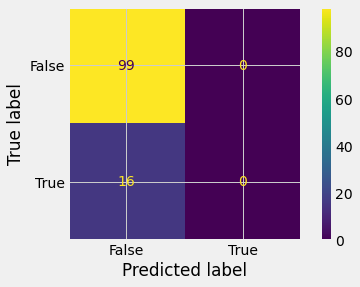

In [57]:
# performance de régression logistique avec GridSearchCV
y_pred = grid_logreg .predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()